### comparison of features of cell assemblies

In [1]:
library(tidyverse)
library(lme4)
library(lmerTest)
library(MASS)


Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.0.4     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'lme4' was built under R version 3.6.3"Loading required package: Matrix

Attaching package: 'Matrix'

The fo

In [2]:
data <- read.csv('F:/Projects/PAE_PlaceCell/analysis/cell_assembly/post_processed/cell_assembly_per_event.csv')

data = data[data$area == 'ca1' | data$area == 'ca3',]

summary(data)


       X                            session           rat           group     
 Min.   :    1   LEM3246_S20190629164240:  979   LEM3216:7224   control:9144  
 1st Qu.: 6566   LEM3246_S20190701153855:  973   LEM3246:4023   pae    :8479  
 Median :11060   LEM3216_S20190805141510:  802   LEM3206:2451                 
 Mean   :10766   LEM3216_S20190718101925:  696   LEM3124:1664                 
 3rd Qu.:15602   LEM3216_S20190720145517:  574   LEM3116:1416                 
 Max.   :20179   LEM3216_S20190723165548:  491   LEM3120: 426                 
                 (Other)                :13108   (Other): 419                 
     area       assembl_strength    assembl_frac       n_assembl    
 ca1   : 4378   Min.   :   5.004   Min.   :0.03448   Min.   : 1.00  
 ca3   :13245   1st Qu.:  12.971   1st Qu.:0.22222   1st Qu.: 7.00  
 cortex:    0   Median :  20.973   Median :0.36364   Median :10.00  
                Mean   :  36.802   Mean   :0.39024   Mean   :11.34  
                3rd Qu.

In [3]:
data$group = factor(data$group, levels=c('control', 'pae'))
data$rat = factor(data$rat)
data$session = factor(data$session)
data$area = factor(data$area, levels=c('ca1', 'ca3'))

In [4]:
table(data$rat,data$group,data$area)

, ,  = ca1

         
          control  pae
  LEM3116     675    0
  LEM3120     252    0
  LEM3124       0  783
  LEM3206       0    0
  LEM3216    2263    0
  LEM3246       0    0
  LS17          0   80
  LS19          0  229
  LS23         60    0
  RH13          3    0
  RH14          1    0
  RH16          0   32

, ,  = ca3

         
          control  pae
  LEM3116     741    0
  LEM3120     174    0
  LEM3124       0  881
  LEM3206       0 2451
  LEM3216    4961    0
  LEM3246       0 4023
  LS17          0    0
  LS19          0    0
  LS23          0    0
  RH13          8    0
  RH14          6    0
  RH16          0    0


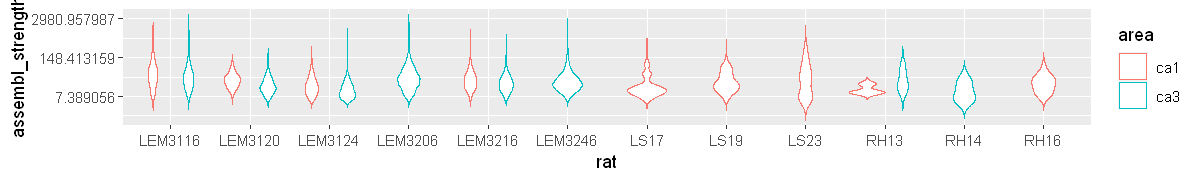

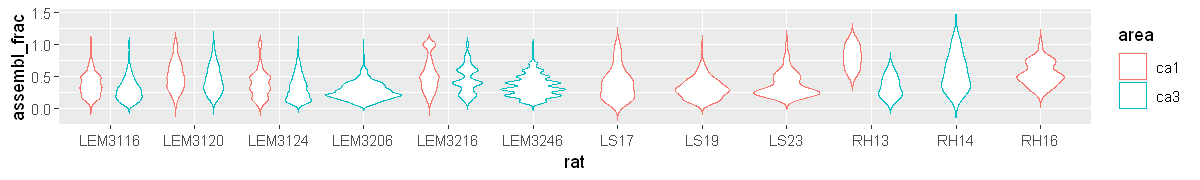

In [5]:

options(repr.plot.width = 10, repr.plot.height = 1.5)

p<-ggplot(data, aes(x=rat, y=assembl_strength, color=area)) +
    geom_violin(trim=FALSE) +
    scale_y_continuous(trans='log')
p

p<-ggplot(data, aes(x=rat, y=assembl_frac, color=area)) +
    geom_violin(trim=FALSE)
p


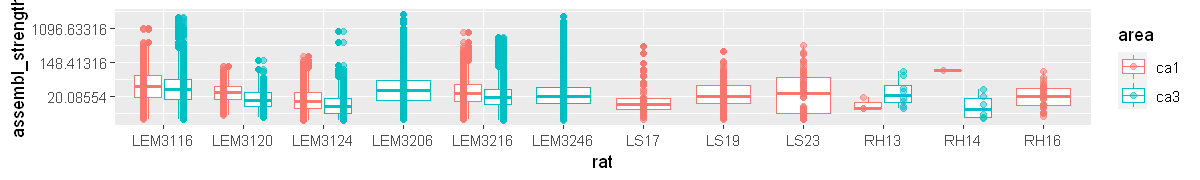

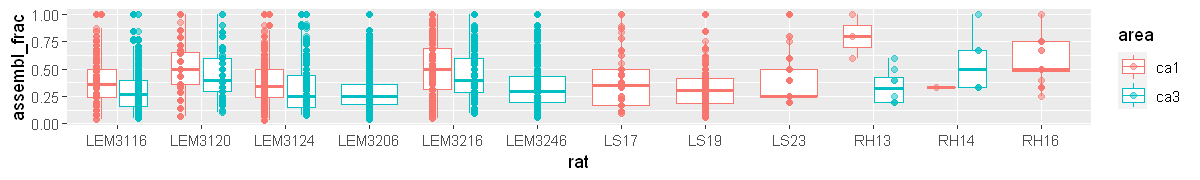

In [6]:
options(repr.plot.width = 10, repr.plot.height = 1.5)

p<-ggplot(data, aes(x=rat, y=assembl_strength, color=area)) +
    geom_boxplot() +
    geom_jitter(position=position_dodge(1),alpha=.5) +
    scale_y_continuous(trans='log')
p

p<-ggplot(data, aes(x=rat, y=assembl_frac, color=area)) +
    geom_boxplot() +
    geom_jitter(position=position_dodge(1),alpha=.5)
p

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,-1071.047,-1045.510,539.5237,-1079.047,NA,NA,NA
m1,5,-1070.426,-1038.504,540.2128,-1080.426,1.378055,1,0.2404327


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: assembl_strength_log ~ group + (1 | rat/session)
   Data: data[data$area == "ca1", ]

     AIC      BIC   logLik deviance df.resid 
 -1070.4  -1038.5    540.2  -1080.4     4373 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.6506 -0.6497  0.0111  0.6561  4.0408 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.018778 0.13703 
 rat         (Intercept) 0.001134 0.03367 
 Residual                0.044052 0.20989 
Number of obs: 4378, groups:  session:rat, 76; rat, 10

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)  1.05478    0.03315 17.23052  31.822   <2e-16 ***
grouppae    -0.05395    0.04432 12.16700  -1.217    0.247    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.748

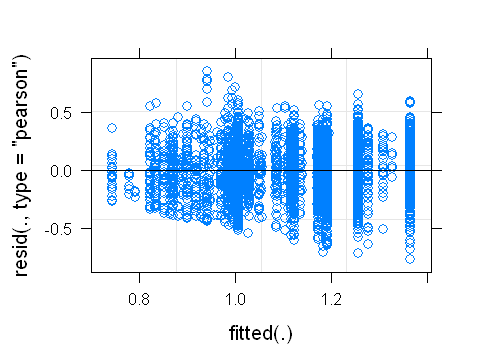

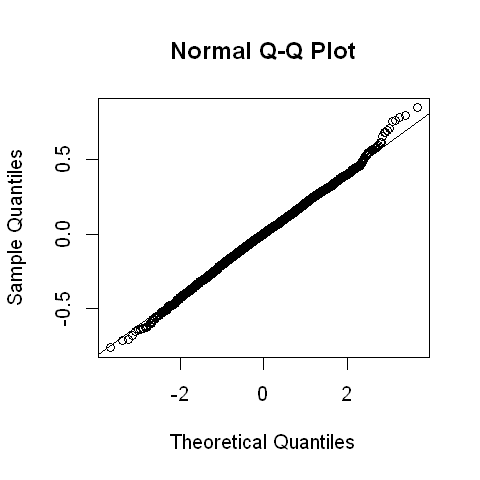

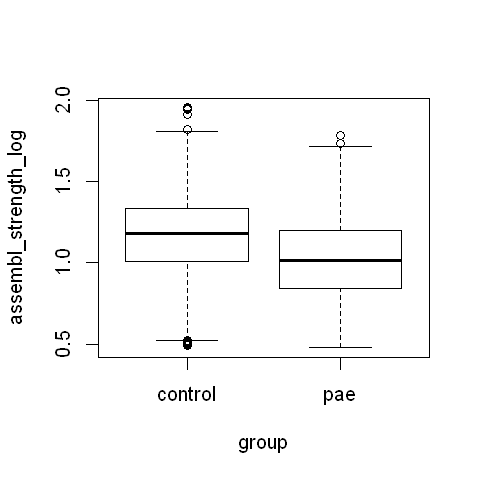

In [43]:
data$assembl_strength_log <- log(log(data$assembl_strength))

m1 = lmer(assembl_strength_log ~ group + (1 | rat/session), data = data[data$area == "ca1",],REML=FALSE)
m1.null = lmer(assembl_strength_log ~ 1 + (1 | rat/session), data = data[data$area == "ca1",], REML=FALSE)
anova(m1.null, m1)  
summary(m1)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

plot(assembl_strength_log ~ group, data = data[data$area == "ca1",])

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,-1877.425,-1847.464,942.7127,-1885.425,NA,NA,NA
m1,5,-1875.445,-1837.993,942.7223,-1885.445,0.01911374,1,0.8900409


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: assembl_strength_log ~ group + (1 | rat/session)
   Data: data[data$area == "ca3", ]

     AIC      BIC   logLik deviance df.resid 
 -1875.4  -1838.0    942.7  -1885.4    13226 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.9010 -0.6319  0.0254  0.6440  4.1649 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.01316  0.11473 
 rat         (Intercept) 0.00780  0.08832 
 Residual                0.04950  0.22249 
Number of obs: 13231, groups:  session:rat, 118; rat, 6

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)  1.03991    0.05528 6.40894  18.811 7.54e-07 ***
grouppae     0.01061    0.07666 5.95589   0.138    0.894    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.721

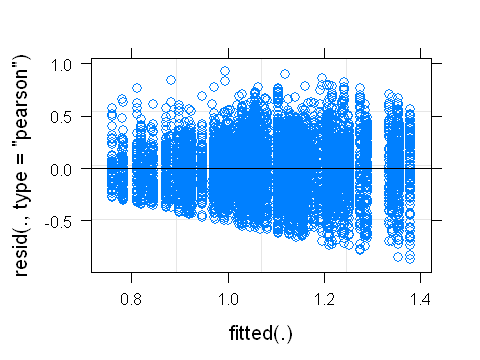

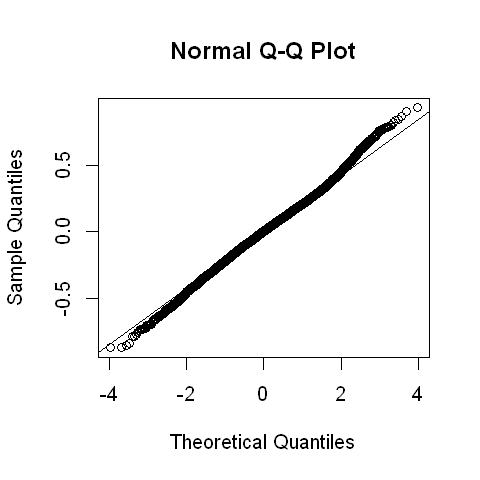

In [33]:
m1 = lmer(assembl_strength_log ~ group + (1 | rat/session), data = data[data$area == "ca3",],REML=FALSE)
m1.null = lmer(assembl_strength_log ~ 1 + (1 | rat/session), data = data[data$area == "ca3",], REML=FALSE)
anova(m1.null, m1)  
summary(m1)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

In [72]:
overdisp.glmer <- function(model) {
  ## From http://glmm.wikidot.com/faq
  ## number of variance parameters in 
  ##   an n-by-n variance-covariance matrix
  vpars <- function(m) {
    nrow(m)*(nrow(m)+1)/2
  }
  model.df <- sum(sapply(lme4::VarCorr(model),vpars))+length(lme4::fixef(model))
  rdf <- nrow(model.frame(model))-model.df
  rp <- residuals(model)
  dev <- sum(rp^2)
  prat <- dev/rdf
  cat(paste("Residual deviance: ",round(dev,3)," on ",rdf," degrees of freedom",
    " (ratio: ",round(prat,3),")\n",sep=""))
}

[1] 0.4615385

[1] 0.3333333

Warning message in eval(family$initialize, rho):
"non-integer #successes in a binomial glm!"Warning message in eval(family$initialize, rho):
"non-integer #successes in a binomial glm!"

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,3,20525.90,20545.05,-10259.95,20519.90,NA,NA,NA
m1,4,20526.74,20552.28,-10259.37,20518.74,1.157677,1,0.2819479


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: assembl_frac ~ group + (1 | rat/session)
   Data: data[data$area == "ca1", ]
Weights: n_assembl

     AIC      BIC   logLik deviance df.resid 
 20526.7  20552.3 -10259.4  20518.7     4370 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.0721 -0.9239 -0.0661  0.7222  4.9151 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.64604  0.8038  
 rat         (Intercept) 0.03419  0.1849  
Number of obs: 4374, groups:  session:rat, 74; rat, 8

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  -0.1227     0.1985  -0.618    0.537
grouppae     -0.2897     0.2573  -1.126    0.260

Correlation of Fixed Effects:
         (Intr)
grouppae -0.767

Residual deviance: 8989.603 on 4370 degrees of freedom (ratio: 2.057)


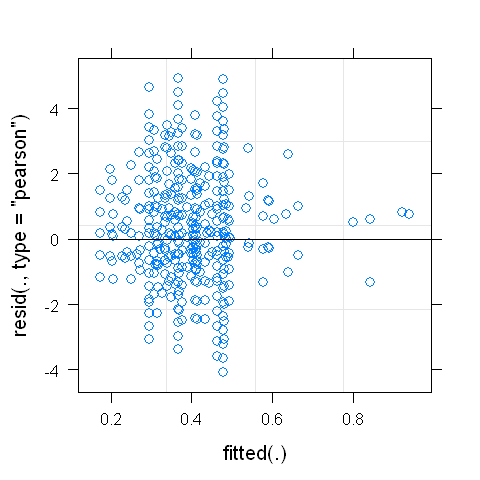

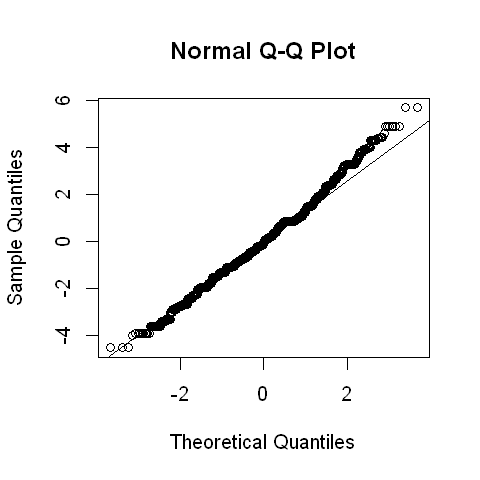

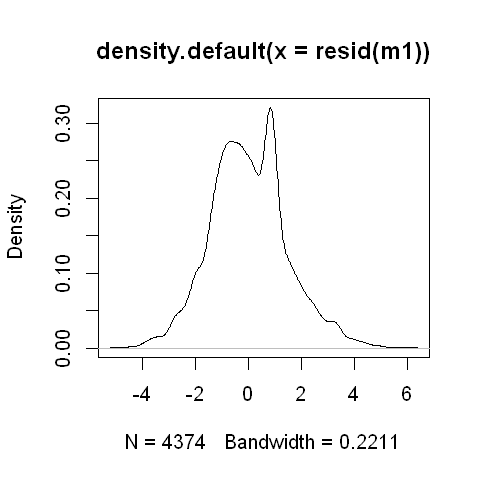

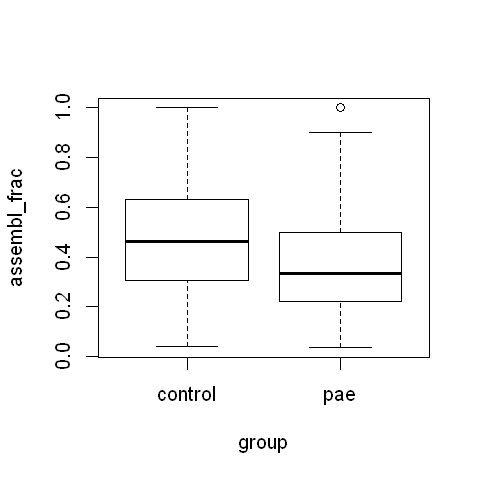

In [35]:
median(data[data$area=='ca1' & data$group=='control',]$assembl_frac,na.rm = TRUE)
median(data[data$area=='ca1' & data$group=='pae',]$assembl_frac,na.rm = TRUE)

m1 = glmer(assembl_frac ~ group + (1|rat/session), weights=n_assembl, data=data[data$area=='ca1',],family="binomial")
m1.null = glmer(assembl_frac ~ 1 + (1|rat/session), weights=n_assembl, data=data[data$area=='ca1',],family="binomial")

anova(m1.null, m1)  

summary(m1)
overdisp.glmer(m1)

options(repr.plot.width = 4, repr.plot.height = 4)

plot(m1)
qqnorm(resid(m1))
qqline(resid(m1))
plot(density(resid(m1)))

plot(assembl_frac ~ group, data = data[data$area == "ca1",])

[1] 0.4

[1] 0.3

Warning message in eval(family$initialize, rho):
"non-integer #successes in a binomial glm!"Warning message in eval(family$initialize, rho):
"non-integer #successes in a binomial glm!"

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,3,48873.14,48895.61,-24433.57,48867.14,NA,NA,NA
m1,4,48873.22,48903.18,-24432.61,48865.22,1.921105,1,0.1657349


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: assembl_frac ~ group + (1 | rat/session)
   Data: data[data$area == "ca3", ]
Weights: n_assembl

     AIC      BIC   logLik deviance df.resid 
 48873.2  48903.2 -24432.6  48865.2    13227 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6409 -0.7977 -0.0861  0.7265  5.5228 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.09030  0.3005  
 rat         (Intercept) 0.05372  0.2318  
Number of obs: 13231, groups:  session:rat, 118; rat, 6

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -0.5123     0.1463  -3.501 0.000463 ***
grouppae     -0.3050     0.2017  -1.513 0.130400    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.723

Residual deviance: 15842.533 on 13227 degrees of freedom (ratio: 1.198)


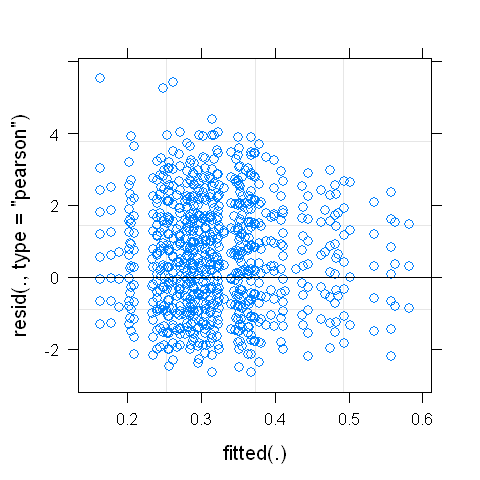

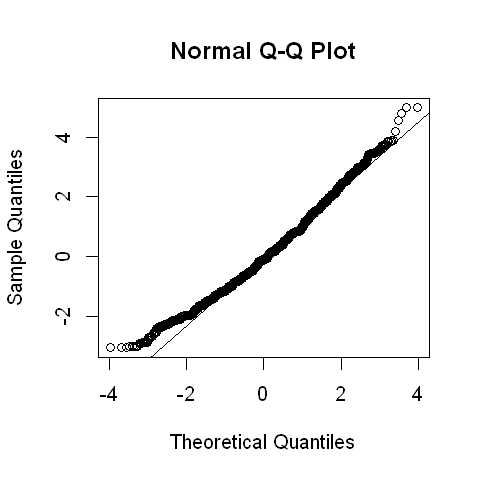

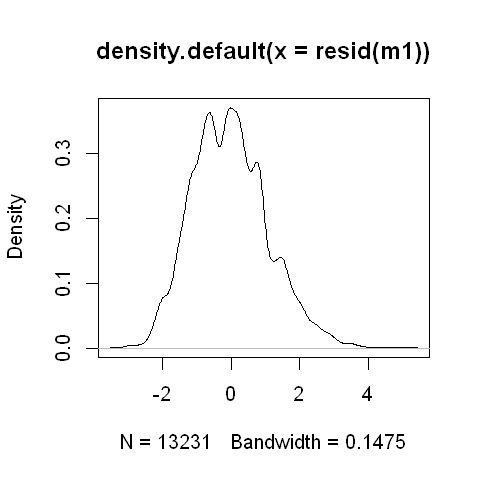

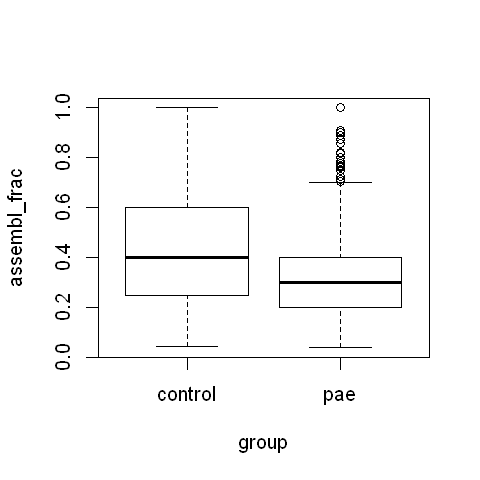

In [36]:
median(data[data$area=='ca3' & data$group=='control',]$assembl_frac,na.rm = TRUE)
median(data[data$area=='ca3' & data$group=='pae',]$assembl_frac,na.rm = TRUE)

m1 = glmer(assembl_frac ~ group + (1|rat/session), weights=n_assembl, data=data[data$area=='ca3',],family="binomial")
m1.null = glmer(assembl_frac ~ 1 + (1|rat/session), weights=n_assembl, data=data[data$area=='ca3',],family="binomial")

anova(m1.null, m1)  

summary(m1)
overdisp.glmer(m1)

options(repr.plot.width = 4, repr.plot.height = 4)

plot(m1)
qqnorm(resid(m1))
qqline(resid(m1))
plot(density(resid(m1)))

plot(assembl_frac ~ group, data = data[data$area == "ca3",])

# Here we load assembly features derived from each ripple epoch 

n here is each unique assembly

In [88]:
data <- read.csv('F:/Projects/PAE_PlaceCell/analysis/cell_assembly/post_processed/within_ripple_rate.csv')

data = data[data$area == 'ca1' | data$area == 'ca3',]

data$group = factor(data$group, levels=c('control', 'pae'))
data$rat = factor(data$rat)
data$session = factor(data$session)
data$area = factor(data$area, levels=c('ca1', 'ca3'))

summary(data)

       X            Unnamed..0                        session          rat     
 Min.   :   0.0   Min.   :   0.0   LEM3124_S20190302163218:  29   LEM3206:573  
 1st Qu.: 495.2   1st Qu.: 495.2   LEM3206_S20190720132154:  26   LEM3124:259  
 Median : 971.5   Median : 971.5   LEM3116_S20180717110938:  25   LEM3116:252  
 Mean   : 965.5   Mean   : 965.5   LEM3206_S20190717140525:  25   LEM3216:228  
 3rd Qu.:1442.8   3rd Qu.:1442.8   LEM3206_S20190719140644:  25   LEM3246:225  
 Max.   :1914.0   Max.   :1914.0   LEM3206_S20190718143924:  24   LS19   :174  
                                   (Other)                :1732   (Other):175  
     group       area      within_ripple_rate assembly_strength 
 control: 588   ca1: 580   Min.   : 0.000     Min.   :   5.159  
 pae    :1298   ca3:1306   1st Qu.: 1.298     1st Qu.:   8.993  
                           Median : 2.582     Median :  12.564  
                           Mean   : 3.555     Mean   :  35.622  
                           3rd Qu.:

## restrict to sessions with >= 25 ripples as measures are derived during ripple times

In [89]:
data = data[data$n_ripple >= 25,]
summary(data)

       X            Unnamed..0                        session          rat     
 Min.   :   5.0   Min.   :   5.0   LEM3124_S20190302163218:  29   LEM3206:501  
 1st Qu.: 487.8   1st Qu.: 487.8   LEM3206_S20190720132154:  26   LEM3124:237  
 Median : 876.5   Median : 876.5   LEM3116_S20180717110938:  25   LEM3246:196  
 Mean   : 869.9   Mean   : 869.9   LEM3206_S20190717140525:  25   LEM3216:188  
 3rd Qu.:1271.2   3rd Qu.:1271.2   LEM3206_S20190719140644:  25   LEM3116:185  
 Max.   :1856.0   Max.   :1856.0   LEM3206_S20190718143924:  24   LEM3120: 39  
                                   (Other)                :1238   (Other): 46  
     group      area      within_ripple_rate assembly_strength 
 control:416   ca1: 306   Min.   : 0.000     Min.   :   5.205  
 pae    :976   ca3:1086   1st Qu.: 1.488     1st Qu.:   9.145  
                          Median : 2.773     Median :  12.594  
                          Mean   : 3.743     Mean   :  36.883  
                          3rd Qu.: 4.901

boundary (singular) fit: see ?isSingular


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,501.7584,516.6265,-246.8792,493.7584,NA,NA,NA
m1,5,498.3014,516.8866,-244.1507,488.3014,5.45693,1,0.01949087


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: y_trans ~ group + (1 | rat/session)
   Data: data[data$area == "ca1", ]

     AIC      BIC   logLik deviance df.resid 
   498.3    516.9   -244.2    488.3      299 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.4809 -0.6093  0.0524  0.6063  3.3044 

Random effects:
 Groups      Name        Variance  Std.Dev. 
 session:rat (Intercept) 1.150e-01 3.392e-01
 rat         (Intercept) 2.296e-17 4.792e-09
 Residual                2.479e-01 4.979e-01
Number of obs: 304, groups:  session:rat, 35; rat, 7

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)   1.5023     0.1039 27.2584  14.466 2.61e-14 ***
grouppae     -0.4369     0.1378 29.4181  -3.169  0.00355 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.753
optimizer (nloptwrap) convergence code: 0 (

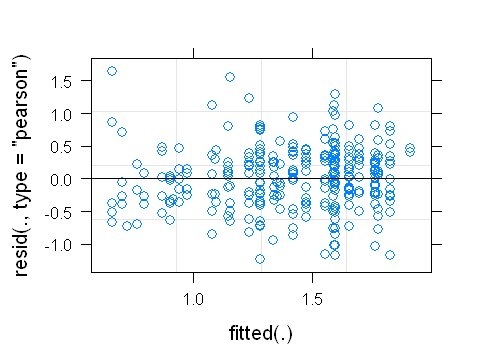

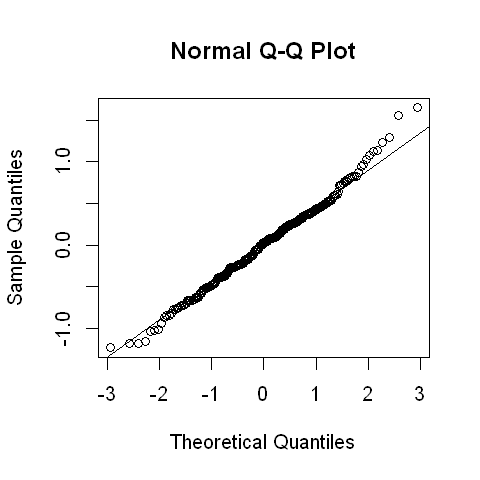

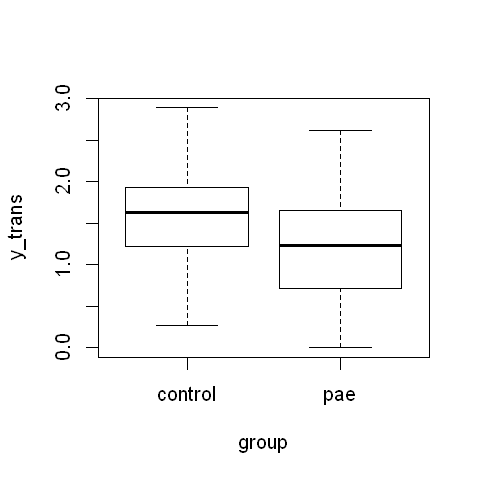

In [90]:
data$y_trans = log(data$within_ripple_rate+1)

m1 = lmer(y_trans ~ group + (1 | rat/session), data = data[data$area == "ca1",],REML=FALSE)
m1.null = lmer(y_trans ~ 1 + (1 | rat/session), data = data[data$area == "ca1",], REML=FALSE)
anova(m1.null, m1)  
summary(m1)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

plot(y_trans ~ group, data = data[data$area == "ca1",])

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,2057.406,2077.367,-1024.703,2049.406,NA,NA,NA
m1,5,2057.850,2082.801,-1023.925,2047.850,1.55624,1,0.2122166


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: y_trans ~ group + (1 | rat/session)
   Data: data[data$area == "ca3", ]

     AIC      BIC   logLik deviance df.resid 
  2057.8   2082.8  -1023.9   2047.8     1081 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.2057 -0.6745 -0.0551  0.6480  3.2586 

Random effects:
 Groups      Name        Variance  Std.Dev.
 session:rat (Intercept) 9.366e-05 0.009678
 rat         (Intercept) 1.764e-02 0.132825
 Residual                3.816e-01 0.617744
Number of obs: 1086, groups:  session:rat, 91; rat, 6

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)  1.45714    0.08957  6.87773  16.268 9.59e-07 ***
grouppae    -0.15694    0.12055  5.90904  -1.302    0.241    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.743

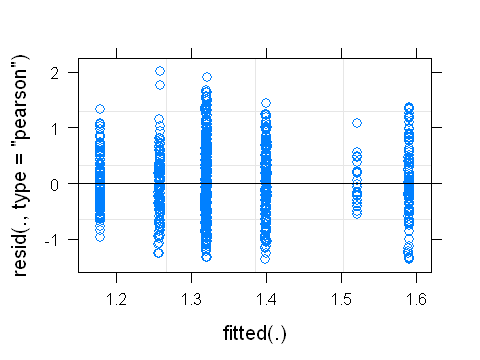

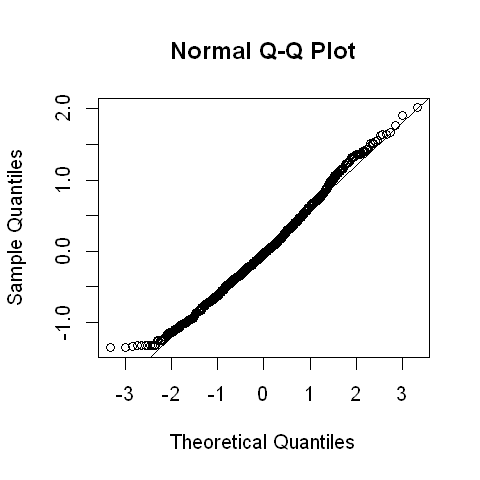

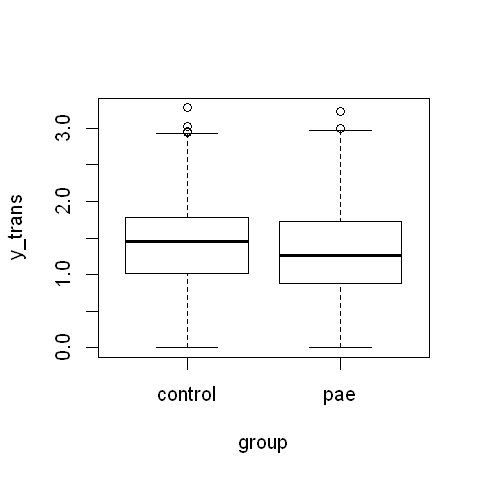

In [91]:
m1 = lmer(y_trans ~ group + (1 | rat/session), data = data[data$area == "ca3",],REML=FALSE)
m1.null = lmer(y_trans ~ 1 + (1 | rat/session), data = data[data$area == "ca3",], REML=FALSE)
anova(m1.null, m1)  
summary(m1)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

plot(y_trans ~ group, data = data[data$area == "ca3",])

boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,-65.36423,-50.54910,36.68212,-73.36423,NA,NA,NA
m1,5,-63.87057,-45.35166,36.93528,-73.87057,0.5063343,1,0.47673


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: y_trans ~ group + (1 | rat/session)
   Data: data[data$area == "ca1", ]

     AIC      BIC   logLik deviance df.resid 
   -63.9    -45.4     36.9    -73.9      295 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.8970 -0.6359 -0.0958  0.5105  3.3779 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.002996 0.05474 
 rat         (Intercept) 0.000000 0.00000 
 Residual                0.043568 0.20873 
Number of obs: 300, groups:  session:rat, 34; rat, 7

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)
(Intercept) -0.04113    0.02374 16.83997  -1.733    0.101
grouppae    -0.02331    0.03274 19.77985  -0.712    0.485

Correlation of Fixed Effects:
         (Intr)
grouppae -0.725
optimizer (nloptwrap) convergence code: 0 (OK)
boundary (singular) fit: see ?isSingular


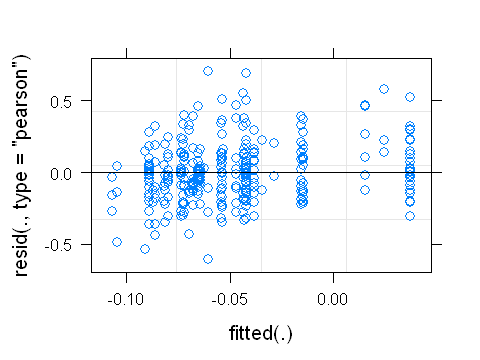

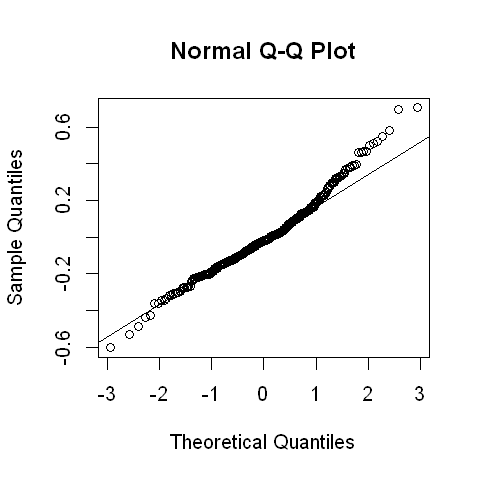

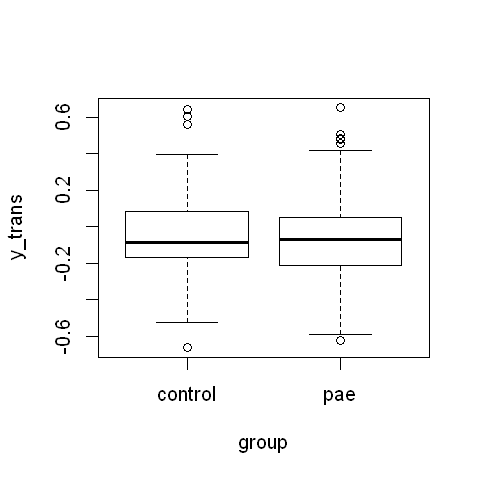

In [92]:
data$y_trans = log(log(log(data$assembly_strength)))

m1 = lmer(y_trans ~ group + (1 | rat/session), data = data[data$area == "ca1",],REML=FALSE)
m1.null = lmer(y_trans ~ 1 + (1 | rat/session), data = data[data$area == "ca1",], REML=FALSE)
anova(m1.null, m1)  
summary(m1)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

plot(y_trans ~ group, data = data[data$area == "ca1",])

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,137.6555,157.5759,-64.82777,129.6555,NA,NA,NA
m1,5,137.4403,162.3406,-63.72013,127.4403,2.215285,1,0.1366498


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: y_trans ~ group + (1 | rat/session)
   Data: data[data$area == "ca3", ]

     AIC      BIC   logLik deviance df.resid 
   137.4    162.3    -63.7    127.4     1070 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.4341 -0.7529 -0.1114  0.6353  3.0579 

Random effects:
 Groups      Name        Variance  Std.Dev.
 session:rat (Intercept) 0.0006734 0.02595 
 rat         (Intercept) 0.0019168 0.04378 
 Residual                0.0647268 0.25441 
Number of obs: 1075, groups:  session:rat, 91; rat, 6

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)
(Intercept)  0.000296   0.031823  7.479031   0.009    0.993
grouppae    -0.069453   0.042061  6.133505  -1.651    0.149

Correlation of Fixed Effects:
         (Intr)
grouppae -0.757

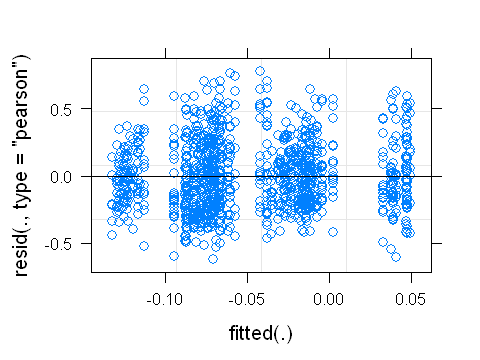

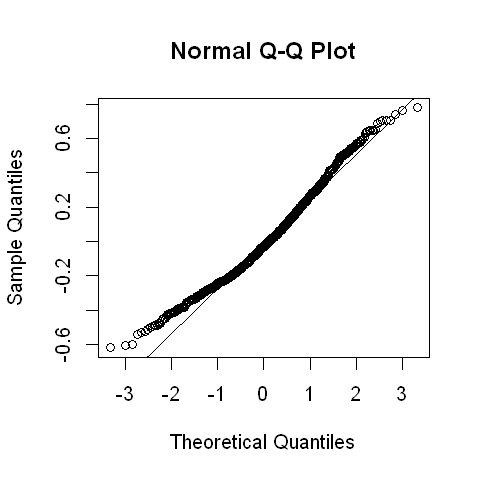

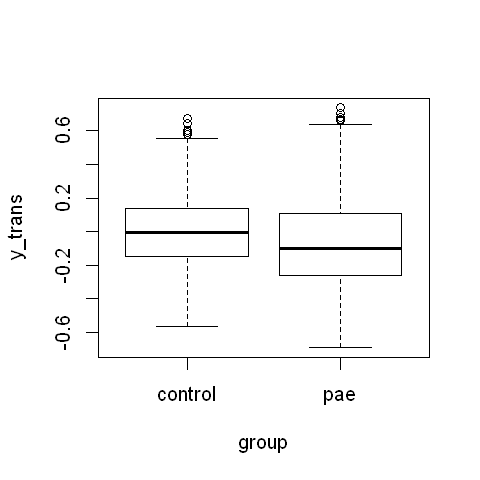

In [93]:
data$y_trans = log(log(log(data$assembly_strength)))

m1 = lmer(y_trans ~ group + (1 | rat/session), data = data[data$area == "ca3",],REML=FALSE)
m1.null = lmer(y_trans ~ 1 + (1 | rat/session), data = data[data$area == "ca3",], REML=FALSE)
anova(m1.null, m1)  
summary(m1)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

plot(y_trans ~ group, data = data[data$area == "ca3",])

boundary (singular) fit: see ?isSingular


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,3,10135.48,10146.63,-5064.738,10129.48,NA,NA,NA
m1,4,10134.27,10149.13,-5063.133,10126.27,3.210468,1,0.07316856


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: peaks_per_assembly ~ group + (1 | rat/session)
   Data: data[data$area == "ca1", ]
Weights: n_ripples

     AIC      BIC   logLik deviance df.resid 
 10134.3  10149.1  -5063.1  10126.3      300 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-19.1952  -2.4728  -0.4828   2.1112  26.0006 

Random effects:
 Groups      Name        Variance  Std.Dev. 
 session:rat (Intercept) 5.597e-01 7.481e-01
 rat         (Intercept) 5.393e-09 7.344e-05
Number of obs: 304, groups:  session:rat, 35; rat, 7

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -0.4780     0.2024  -2.362   0.0182 *  
grouppae     -1.0720     0.2643  -4.056    5e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.765
optimizer (Nelder_Mead) convergence code: 0 (OK)
bo

Residual deviance: 8497.343 on 300 degrees of freedom (ratio: 28.324)


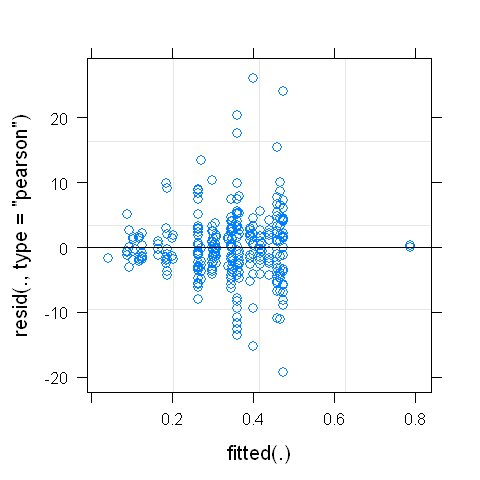

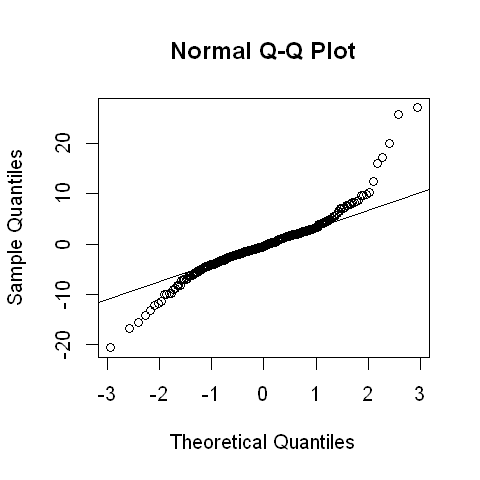

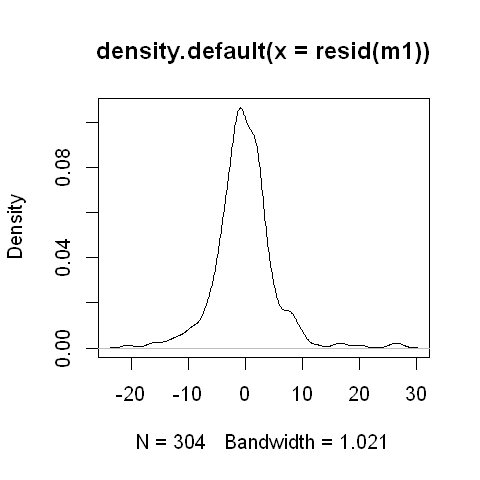

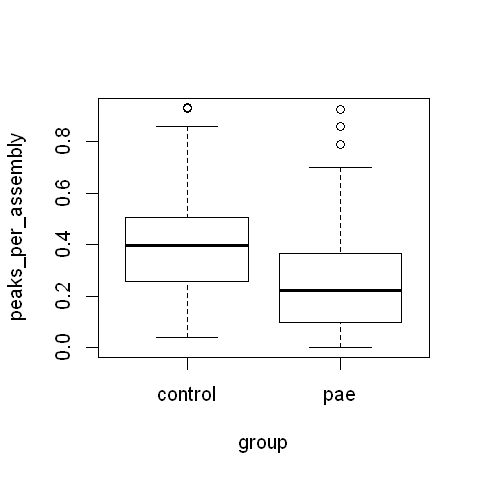

In [94]:
m1 = glmer(peaks_per_assembly ~ group + (1|rat/session), weights=n_ripples, data=data[data$area=='ca1',],family="binomial")
m1.null = glmer(peaks_per_assembly ~ 1 + (1|rat/session), weights=n_ripples, data=data[data$area=='ca1',],family="binomial")

anova(m1.null, m1)  

summary(m1)
overdisp.glmer(m1)

options(repr.plot.width = 4, repr.plot.height = 4)

plot(m1)
qqnorm(resid(m1))
qqline(resid(m1))
plot(density(resid(m1)))

plot(peaks_per_assembly ~ group, data = data[data$area == "ca1",])

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,3,37551.51,37566.49,-18772.76,37545.51,NA,NA,NA
m1,4,37550.69,37570.66,-18771.35,37542.69,2.8204,1,0.09307322


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: peaks_per_assembly ~ group + (1 | rat/session)
   Data: data[data$area == "ca3", ]
Weights: n_ripples

     AIC      BIC   logLik deviance df.resid 
 37550.7  37570.7 -18771.3  37542.7     1082 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-22.802  -2.518  -0.735   1.866  44.241 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.09595  0.3098  
 rat         (Intercept) 0.07601  0.2757  
Number of obs: 1086, groups:  session:rat, 91; rat, 6

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -0.6481     0.1760  -3.682 0.000231 ***
grouppae     -0.4553     0.2410  -1.889 0.058886 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.730

Residual deviance: 32476.102 on 1082 degrees of freedom (ratio: 30.015)


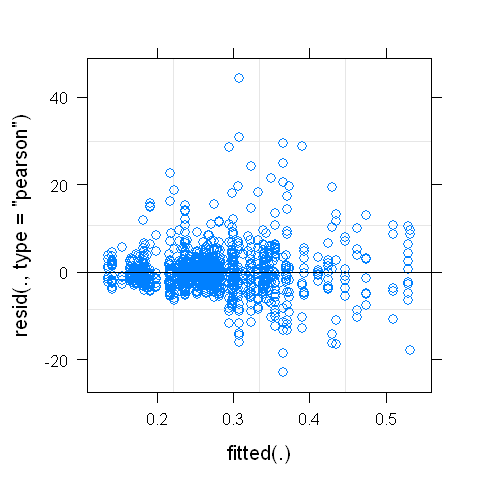

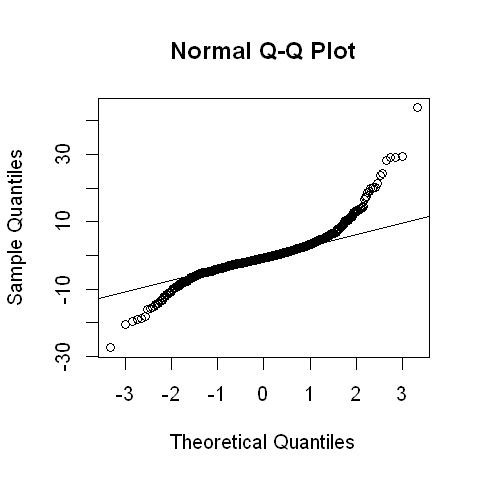

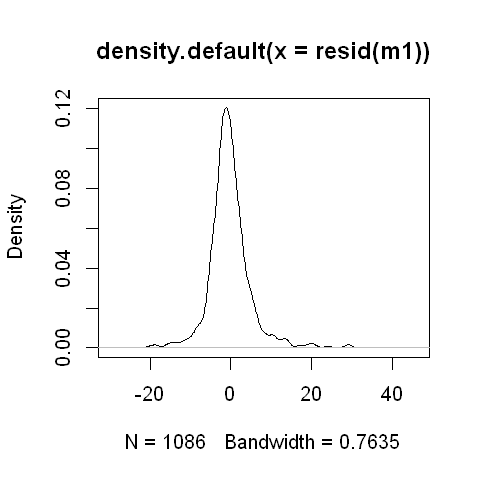

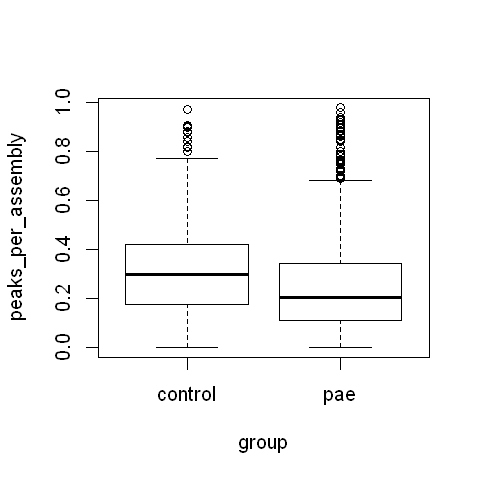

In [95]:
m1 = glmer(peaks_per_assembly ~ group + (1|rat/session), weights=n_ripples, data=data[data$area=='ca3',],family="binomial")
m1.null = glmer(peaks_per_assembly ~ 1 + (1|rat/session), weights=n_ripples, data=data[data$area=='ca3',],family="binomial")

anova(m1.null, m1)  

summary(m1)
overdisp.glmer(m1)

options(repr.plot.width = 4, repr.plot.height = 4)

plot(m1)
qqnorm(resid(m1))
qqline(resid(m1))
plot(density(resid(m1)))

plot(peaks_per_assembly ~ group, data = data[data$area == "ca3",])

In [7]:
data <- read.csv('F:/Projects/PAE_PlaceCell/analysis/cell_assembly/post_processed/cell_assembly.csv')

data = data[data$area == 'ca1' | data$area == 'ca3',]

summary(data)

       X                            session         rat         group    
 Min.   :  0.0   LEM3124_S20190307132509:  2   LEM3124:37   control: 80  
 1st Qu.: 59.0   LEM3124_S20190307163732:  2   LEM3206:36   pae    :123  
 Median :119.0   LEM3124_S20190309145324:  2   LEM3116:30                
 Mean   :114.3   LEM3124_S20190311161641:  2   LEM3216:28                
 3rd Qu.:169.5   LEM3124_S20190315160017:  2   LEM3246:22                
 Max.   :220.0   LEM3124_S20190319154019:  2   LS19   :15                
                 (Other)                :191   (Other):35                
     area       n_assembl         n_units       n_assembl_n_cell_frac
 ca1   : 80   Min.   : 1.000   Min.   :  3.00   Min.   :0.1081       
 ca3   :123   1st Qu.: 5.000   1st Qu.: 20.00   1st Qu.:0.1954       
 cortex:  0   Median : 8.000   Median : 36.50   Median :0.2222       
              Mean   : 9.415   Mean   : 42.01   Mean   :0.2328       
              3rd Qu.:13.000   3rd Qu.: 56.25   3rd Qu.:0.

In [8]:
data$group = factor(data$group, levels=c('control', 'pae'))
data$rat = factor(data$rat)
data$session = factor(data$session)
data$area = factor(data$area, levels=c('ca1', 'ca3'))

[1] 1.990595

[1] 2.258751

boundary (singular) fit: see ?isSingular


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,3,151.8253,158.1083,-72.91263,145.8253,NA,NA,NA
m1,4,152.7504,161.1278,-72.37522,144.7504,1.074835,1,0.2998559


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: n_cells_per_assembl ~ group + (1 | rat)
   Data: data[data$area == "ca1", ]

     AIC      BIC   logLik deviance df.resid 
   152.8    161.1    -72.4    144.8       56 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.55707 -0.81303 -0.06586  0.74361  2.15392 

Random effects:
 Groups   Name        Variance Std.Dev.
 rat      (Intercept) 0.0000   0.0000  
 Residual             0.6535   0.8084  
Number of obs: 60, groups:  rat, 10

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)   1.9906     0.1764 60.0000  11.284   <2e-16 ***
grouppae      0.2682     0.2188 60.0000   1.226    0.225    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.806
optimizer (nloptwrap) convergence code: 0 (OK)
boundary (singular) fit: see ?isSingular


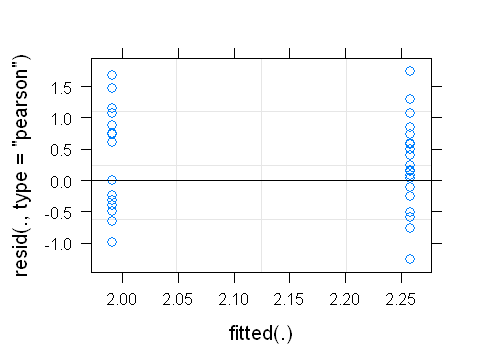

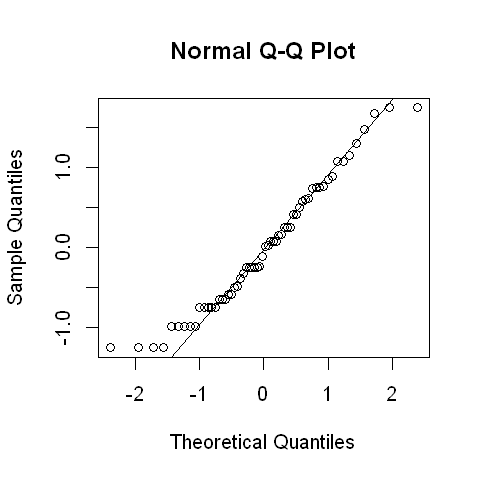

In [22]:
mean(data[data$area == "ca1" & data$group == 'control',]$n_cells_per_assembl,na.rm=TRUE)
mean(data[data$area == "ca1" & data$group == 'pae',]$n_cells_per_assembl,na.rm=TRUE)

m1 = lmer(n_cells_per_assembl ~ group + (1 | rat), data = data[data$area == "ca1",],REML=FALSE)
m1.null = lmer(n_cells_per_assembl ~ 1 + (1 | rat), data = data[data$area == "ca1",], REML=FALSE)
anova(m1.null, m1)  
summary(m1)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

[1] 2.111488

[1] 2.397944

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,3,217.3874,225.516,-105.6937,211.3874,NA,NA,NA
m1,4,217.2618,228.100,-104.6309,209.2618,2.125537,1,0.144862


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: n_cells_per_assembl ~ group + (1 | rat)
   Data: data[data$area == "ca3", ]

     AIC      BIC   logLik deviance df.resid 
   217.3    228.1   -104.6    209.3      107 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.38995 -0.60590 -0.00726  0.60407  2.67031 

Random effects:
 Groups   Name        Variance Std.Dev.
 rat      (Intercept) 0.0186   0.1364  
 Residual             0.3727   0.6105  
Number of obs: 111, groups:  rat, 7

Fixed effects:
            Estimate Std. Error     df t value Pr(>|t|)    
(Intercept)   2.1063     0.1228 9.2947   17.15 2.38e-08 ***
grouppae      0.2643     0.1642 6.3744    1.61    0.156    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.748

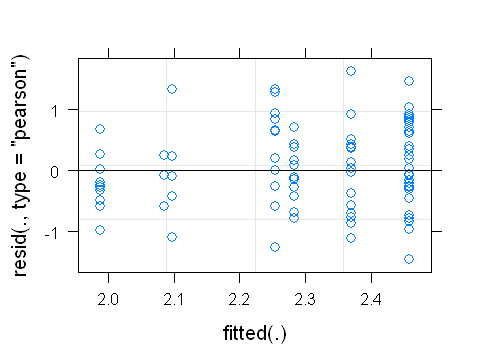

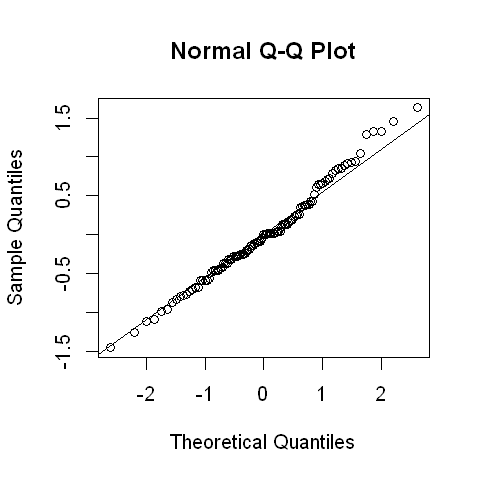

In [23]:
mean(data[data$area == "ca3" & data$group == 'control',]$n_cells_per_assembl,na.rm=TRUE)
mean(data[data$area == "ca3" & data$group == 'pae',]$n_cells_per_assembl,na.rm=TRUE)

m1 = lmer(n_cells_per_assembl ~ group + (1 | rat), data = data[data$area == "ca3",],REML=FALSE)
m1.null = lmer(n_cells_per_assembl ~ 1 + (1 | rat), data = data[data$area == "ca3",], REML=FALSE)
anova(m1.null, m1)  
summary(m1)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,2,331.2944,336.2717,-163.6472,327.2944,NA,NA,NA
m1,3,333.2549,340.7208,-163.6275,327.2549,0.03948694,1,0.8424871


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: n_assembl_n_cell_frac ~ group + (1 | rat)
   Data: data[data$area == "ca1", ]
Weights: n_units

     AIC      BIC   logLik deviance df.resid 
   333.3    340.7   -163.6    327.3       86 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.21463 -0.35432  0.09775  0.41715  1.56128 

Random effects:
 Groups Name        Variance Std.Dev.
 rat    (Intercept) 0.01675  0.1294  
Number of obs: 89, groups:  rat, 10

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.2965     0.1052 -12.329   <2e-16 ***
grouppae     -0.0273     0.1381  -0.198    0.843    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.768

Residual deviance: 28.792 on 86 degrees of freedom (ratio: 0.335)


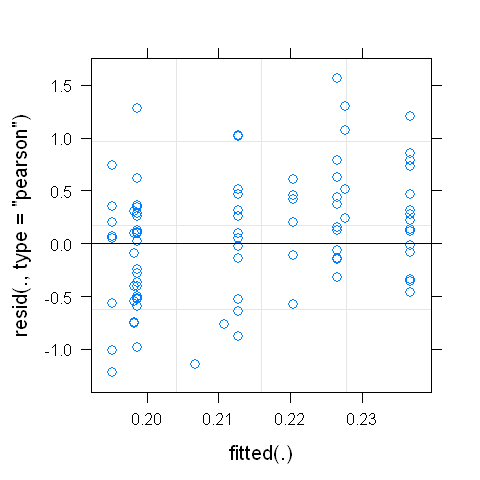

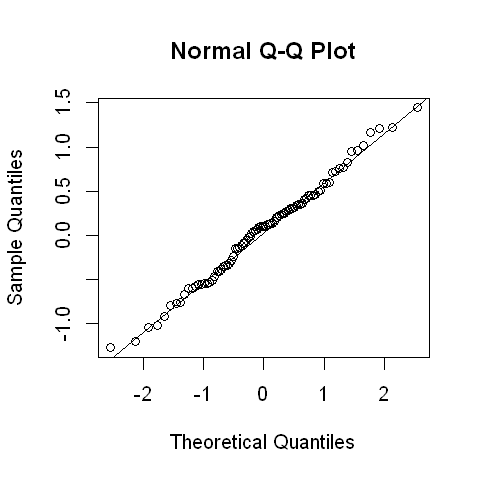

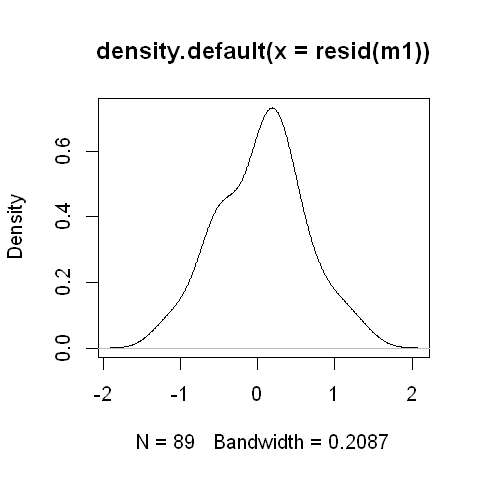

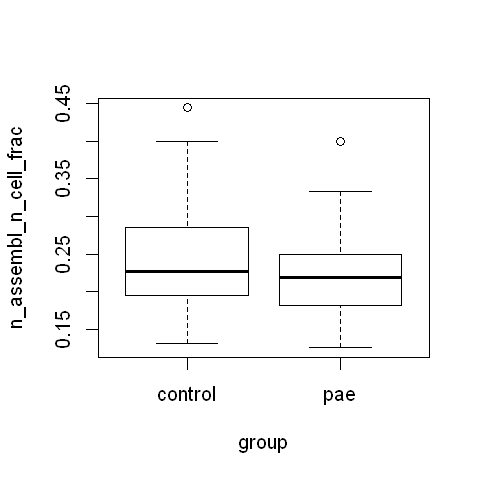

In [42]:
m1 = glmer(n_assembl_n_cell_frac ~ group + (1|rat), weights=n_units, data=data[data$area=='ca1',],family="binomial")
m1.null = glmer(n_assembl_n_cell_frac ~ 1 + (1|rat), weights=n_units, data=data[data$area=='ca1',],family="binomial")

anova(m1.null, m1)  

summary(m1)
overdisp.glmer(m1)

options(repr.plot.width = 4, repr.plot.height = 4)

plot(m1)
qqnorm(resid(m1))
qqline(resid(m1))
plot(density(resid(m1)))

plot(n_assembl_n_cell_frac ~ group, data = data[data$area == "ca1",])

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,2,545.9329,551.6054,-270.9664,541.9329,NA,NA,NA
m1,3,545.6571,554.1659,-269.8285,539.6571,2.275816,1,0.1314059


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: n_assembl_n_cell_frac ~ group + (1 | rat)
   Data: data[data$area == "ca3", ]
Weights: n_units

     AIC      BIC   logLik deviance df.resid 
   545.7    554.2   -269.8    539.7      123 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.75268 -0.43634 -0.04976  0.55906  1.67613 

Random effects:
 Groups Name        Variance Std.Dev.
 rat    (Intercept) 0.005852 0.0765  
Number of obs: 126, groups:  rat, 8

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.12597    0.07265 -15.500   <2e-16 ***
grouppae    -0.15080    0.09522  -1.584    0.113    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.747

Residual deviance: 61.198 on 123 degrees of freedom (ratio: 0.498)


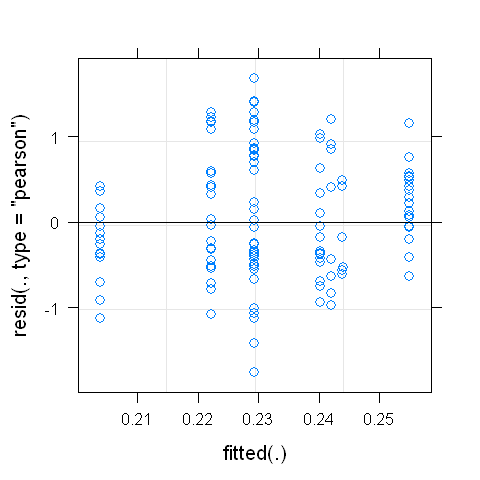

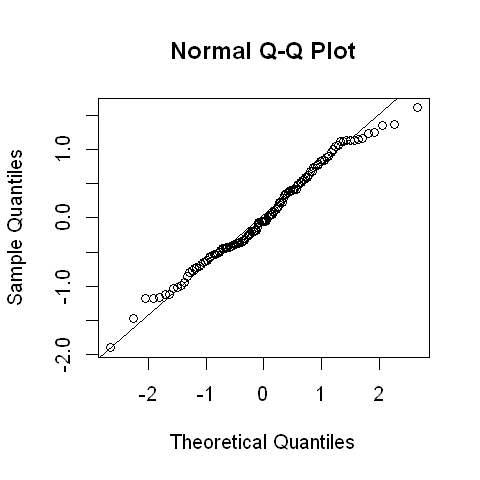

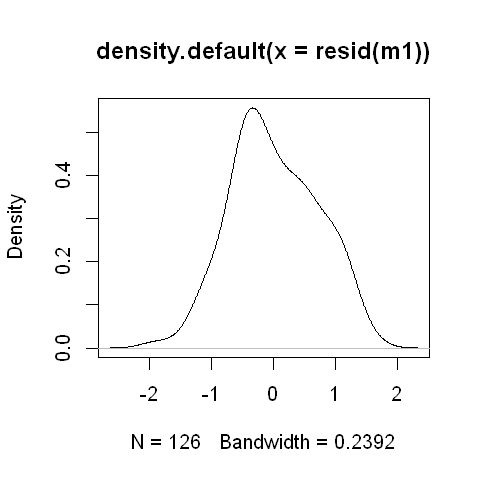

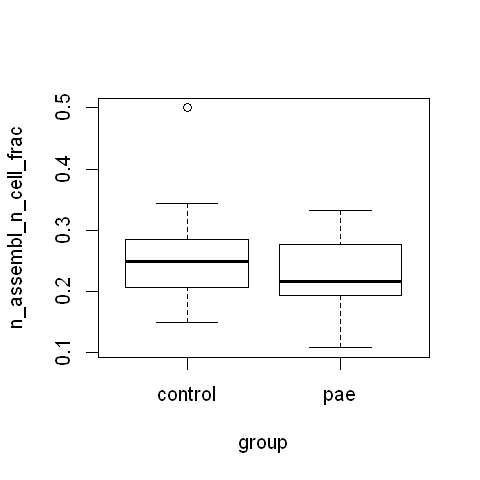

In [43]:
m1 = glmer(n_assembl_n_cell_frac ~ group + (1|rat), weights=n_units, data=data[data$area=='ca3',],family="binomial")
m1.null = glmer(n_assembl_n_cell_frac ~ 1 + (1|rat), weights=n_units, data=data[data$area=='ca3',],family="binomial")

anova(m1.null, m1)  

summary(m1)
overdisp.glmer(m1)

options(repr.plot.width = 4, repr.plot.height = 4)

plot(m1)
qqnorm(resid(m1))
qqline(resid(m1))
plot(density(resid(m1)))

plot(n_assembl_n_cell_frac ~ group, data = data[data$area == "ca3",])

## number of unique sessions

In [143]:
data <- read.csv('F:/Projects/PAE_PlaceCell/analysis/session_df.csv')
data$group = factor(data$group, levels=c('control', 'pae'))
data$session = factor(data$session)
summary(data)




       X                             session        group    
 Min.   :  0.00   LEM3116_S20180715121821:  1   control:172  
 1st Qu.: 94.75   LEM3116_S20180715160836:  1   pae    :208  
 Median :189.50   LEM3116_S20180716115155:  1                
 Mean   :189.50   LEM3116_S20180716174306:  1                
 3rd Qu.:284.25   LEM3116_S20180717110938:  1                
 Max.   :379.00   LEM3116_S20180717203042:  1                
                  (Other)                :374                

In [144]:
table(data$group)

test <- chisq.test(table(data$group))
test


control     pae 
    172     208 


	Chi-squared test for given probabilities

data:  table(data$group)
X-squared = 3.4105, df = 1, p-value = 0.06478


## number of unique epochs between groups

In [2]:
data <- read.csv('F:/Projects/PAE_PlaceCell/analysis/epoch_df.csv')
summary(data)

       X                           session           ep_type   
 Min.   :   0   LEM3116_S20180715121821:   7   cylinder_1:162  
 1st Qu.: 299   LEM3116_S20180715160836:   7   cylinder_2:160  
 Median : 598   LEM3116_S20180716174306:   7   pedestal_1:187  
 Mean   : 598   LEM3116_S20180717110938:   7   pedestal_2:177  
 3rd Qu.: 897   LEM3116_S20180717203042:   7   pedestal_3:162  
 Max.   :1196   LEM3116_S20180718184628:   7   pedestal_4:160  
                (Other)                :1155   track     :189  
 epoch_duration       group          rat     
 Min.   :   0.0   control:481   LEM3206:246  
 1st Qu.:  92.0   pae    :716   LEM3216:188  
 Median : 229.5                 LEM3116:186  
 Mean   : 453.9                 LEM3124:155  
 3rd Qu.: 737.0                 LEM3246:154  
 Max.   :2835.5                 LS19   :105  
                                (Other):163  

In [3]:
data$group = factor(data$group, levels=c('control', 'pae'))
data$rat = factor(data$rat)
data$session = factor(data$session)
data$ep_type = factor(data$ep_type, levels=c('pedestal_1', 'track', 'pedestal_2','cylinder_1','pedestal_3','cylinder_2','pedestal_4'))

In [4]:
df <- data%>%
   group_by(ep_type)%>%
   count(group)

sum(df$n)

[1] 1197

In [5]:
table(data$ep_type, data$group)

            
             control pae
  pedestal_1      79 108
  track           80 109
  pedestal_2      74 103
  cylinder_1      62 100
  pedestal_3      62 100
  cylinder_2      62  98
  pedestal_4      62  98

In [116]:
test <- chisq.test(table(data$ep_type, data$group))
test


	Pearson's Chi-squared test

data:  table(data$ep_type, data$group)
X-squared = 1.6532, df = 6, p-value = 0.9487


In [68]:
set_size <- function(width, fraction, subplots) {
#     """Set figure dimensions to avoid scaling in LaTeX.
#     Parameters
#     ----------
#     width: float or string
#             Document width in points, or string of predined document type
#     fraction: float, optional
#             Fraction of the width which you wish the figure to occupy
#     subplots: array-like, optional
#             The number of rows and columns of subplots.
#     Returns
#     -------
#     fig_dim: tuple
#             Dimensions of figure in inches
#     """

    if (width == 'thesis') {
    width_pt = 426.79135
    } else if ( width == 'beamer')  {
    width_pt = 307.28987
    } else {
    width_pt = width    
    }
    

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[1] / subplots[2])
    output <- c(fig_width_in, fig_height_in)
    return(output)
}

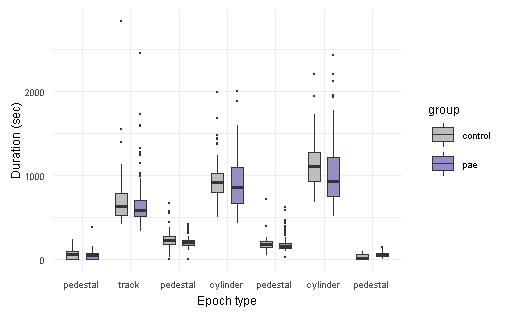

In [102]:
library(ggplot2)

width_height <- set_size('beamer', 1, c(2,2)) 

options(repr.plot.width = width_height[1], repr.plot.height = width_height[2])

p <- ggplot(data, aes(x=ep_type, y=epoch_duration, fill=group)) +
        geom_boxplot(position=position_dodge(0.8),width=.5,outlier.size = .05)+
        scale_fill_manual(values=c("#bdbdbd","#998ec3"))+
        xlab('Epoch type')+
        ylab('Duration (sec)') + 
        theme_minimal() +
        theme(text = element_text(size = 7)) + 
        theme(legend.position = "right") +
        scale_x_discrete(labels=c("pedestal", "track", "pedestal","cylinder","pedestal","cylinder","pedestal"))
p
# c(0.95, 0.7)
ggsave("D:/ryanh/GoogleDrive/school_work/UNM/Lab/Projects/Dissertation/dissertation/inkscape_figs/behavior/epoch_dur.pdf",width = width_height[1], height = width_height[2], units = "in")

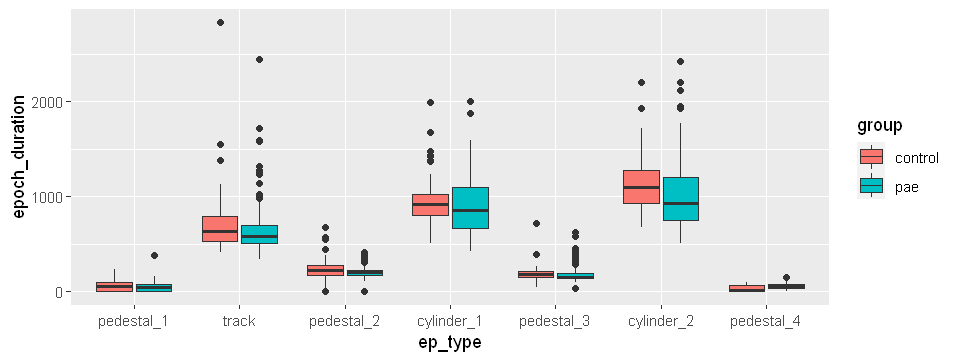

In [29]:
options(repr.plot.width = 8, repr.plot.height = 3)

ggplot(data, aes(x=ep_type, y=epoch_duration, fill=group)) +
    geom_boxplot()

## average pedestal time

[1] 2.146137

[1] 2.375029

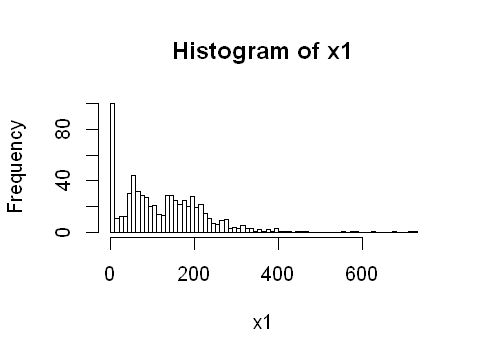

[1] 2.28601

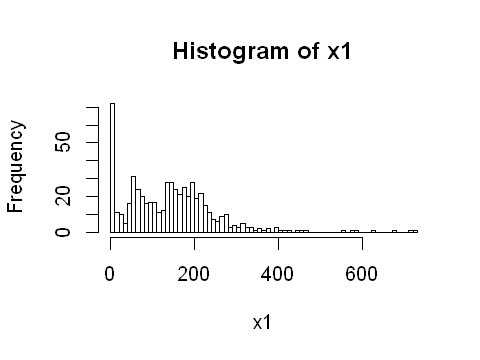

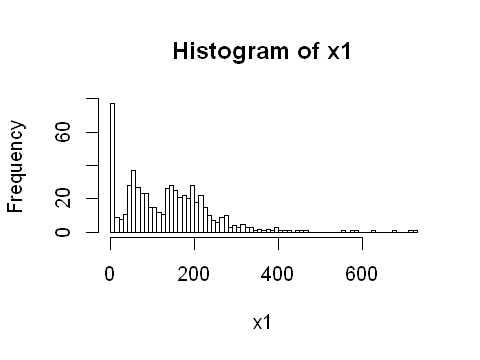

In [20]:
x1 = data[data$ep_type=='pedestal_1' | data$ep_type=='pedestal_2' |data$ep_type=='pedestal_3' | data$ep_type=='pedestal_4',]$epoch_duration
mean(x1) / 60
options(repr.plot.width = 4, repr.plot.height = 3)
hist(x1,100)

x1 = data[data$group == 'control' & data$ep_type=='pedestal_1' | data$ep_type=='pedestal_2' |data$ep_type=='pedestal_3' | data$ep_type=='pedestal_4',]$epoch_duration
mean(x1) / 60
options(repr.plot.width = 4, repr.plot.height = 3)
hist(x1,100)

x1 = data[data$group == 'pae' & data$ep_type=='pedestal_1' | data$ep_type=='pedestal_2' |data$ep_type=='pedestal_3' | data$ep_type=='pedestal_4',]$epoch_duration
mean(x1) / 60
options(repr.plot.width = 4, repr.plot.height = 3)
hist(x1,100)

Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: epoch_duration_trans ~ group + (1 | rat)
   Data: data[data$ep_type == "pedestal_1", ]

     AIC      BIC   logLik deviance df.resid 
   950.1    963.0   -471.1    942.1      183 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.2605 -0.4682 -0.1106  0.4665  4.0572 

Random effects:
 Groups   Name        Variance Std.Dev.
 rat      (Intercept) 12.408   3.523   
 Residual              7.472   2.734   
Number of obs: 187, groups:  rat, 12

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)  
(Intercept)  4.62802    1.53387 12.41590   3.017   0.0104 *
grouppae     0.09085    2.12736 11.69642   0.043   0.9667  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.721

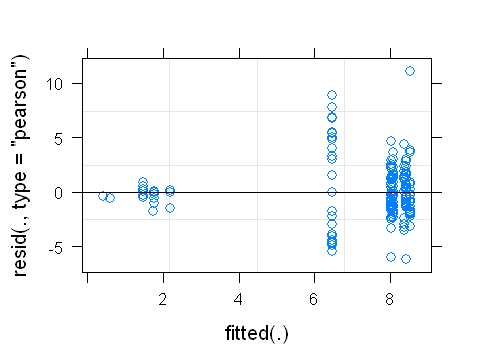

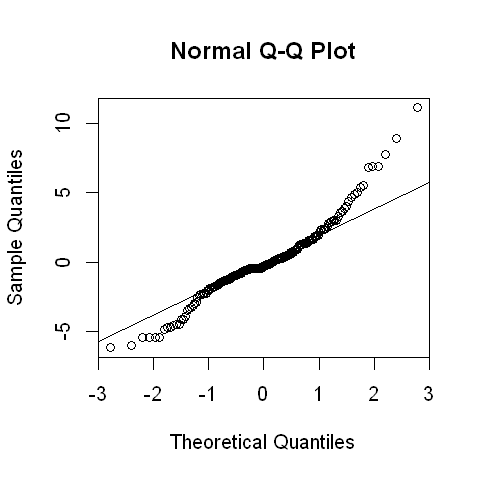

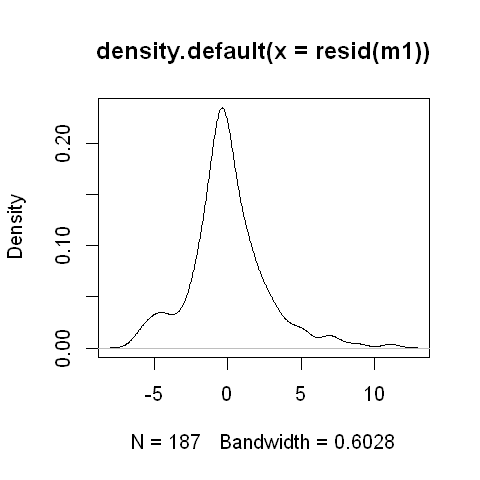

In [61]:
data$epoch_duration_trans = sqrt(data$epoch_duration)
# data$epoch_duration_trans = (data$epoch_duration)

m1 = lmer(epoch_duration_trans ~ group + (1 | rat), data = data[data$ep_type=='pedestal_1',], REML=FALSE)
summary(m1)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))
plot(density(resid(m1)))


boundary (singular) fit: see ?isSingular


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: epoch_duration_trans ~ group + (1 | rat)
   Data: data[data$ep_type == "pedestal_2", ]

     AIC      BIC   logLik deviance df.resid 
   932.8    945.5   -462.4    924.8      173 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.3151 -0.3633  0.0043  0.4691  3.4796 

Random effects:
 Groups   Name        Variance Std.Dev.
 rat      (Intercept)  0.00    0.000   
 Residual             10.88    3.299   
Number of obs: 177, groups:  rat, 10

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)  14.4837     0.3835 177.0000  37.772   <2e-16 ***
grouppae     -0.2500     0.5027 177.0000  -0.497     0.62    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.763
optimizer (nloptwrap) convergence code: 0 (OK)
boundary (singular) fit: see ?isSingular


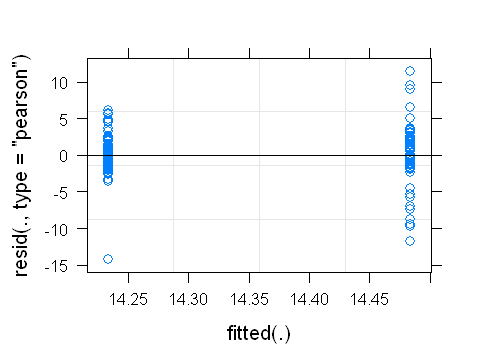

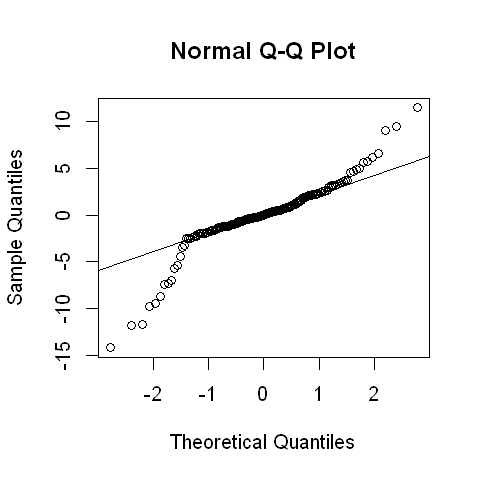

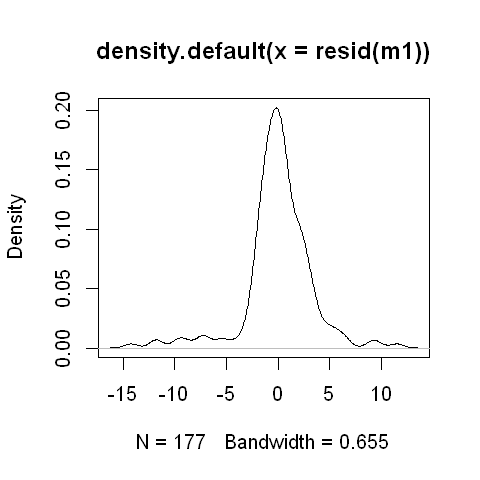

In [62]:
m1 = lmer(epoch_duration_trans ~ group + (1 | rat), data = data[data$ep_type=='pedestal_2',], REML=FALSE)
summary(m1)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))
plot(density(resid(m1)))


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: epoch_duration_trans ~ group + (1 | rat)
   Data: data[data$ep_type == "pedestal_3", ]

     AIC      BIC   logLik deviance df.resid 
   790.9    803.3   -391.5    782.9      158 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.5009 -0.5162 -0.1471  0.4216  4.5668 

Random effects:
 Groups   Name        Variance Std.Dev.
 rat      (Intercept) 3.472    1.863   
 Residual             6.506    2.551   
Number of obs: 162, groups:  rat, 9

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)  13.1922     1.0178  9.3104  12.962 2.87e-07 ***
grouppae      0.9117     1.3480  8.9185   0.676    0.516    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.755

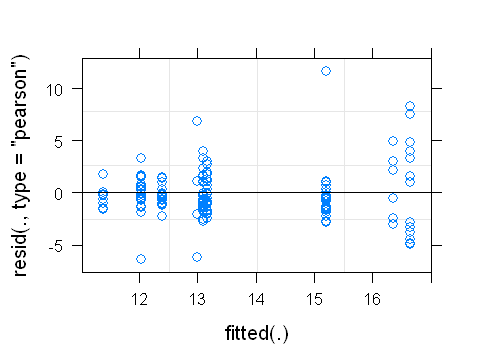

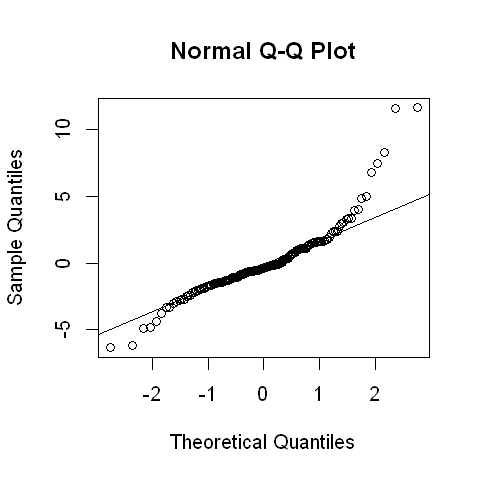

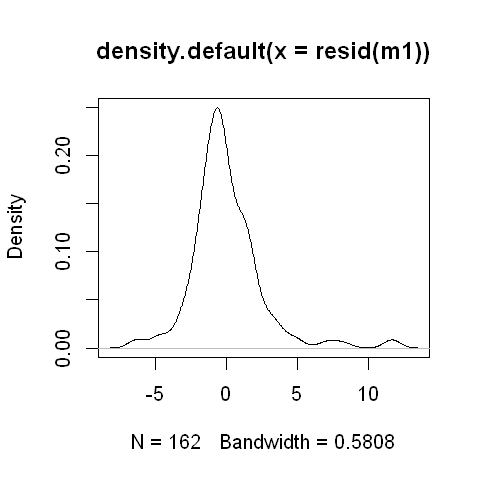

In [63]:
m1 = lmer(epoch_duration_trans ~ group + (1 | rat), data = data[data$ep_type=='pedestal_3',], REML=FALSE)
summary(m1)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))
plot(density(resid(m1)))


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: epoch_duration_trans ~ group + (1 | rat)
   Data: data[data$ep_type == "pedestal_4", ]

     AIC      BIC   logLik deviance df.resid 
   590.9    603.2   -291.5    582.9      156 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6072 -0.6811 -0.2603  0.6465  2.7053 

Random effects:
 Groups   Name        Variance Std.Dev.
 rat      (Intercept) 8.889    2.981   
 Residual             1.755    1.325   
Number of obs: 160, groups:  rat, 9

Fixed effects:
            Estimate Std. Error    df t value Pr(>|t|)  
(Intercept)    3.703      1.507 9.094   2.457   0.0361 *
grouppae       2.068      2.018 9.031   1.025   0.3322  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.747

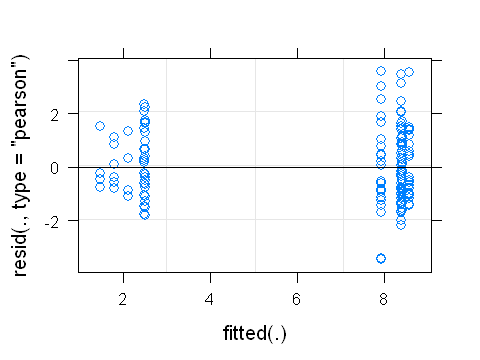

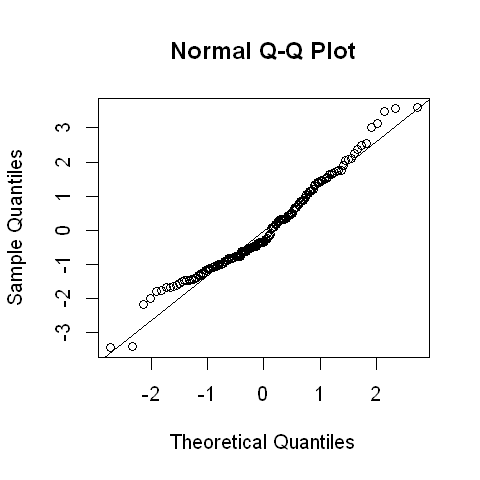

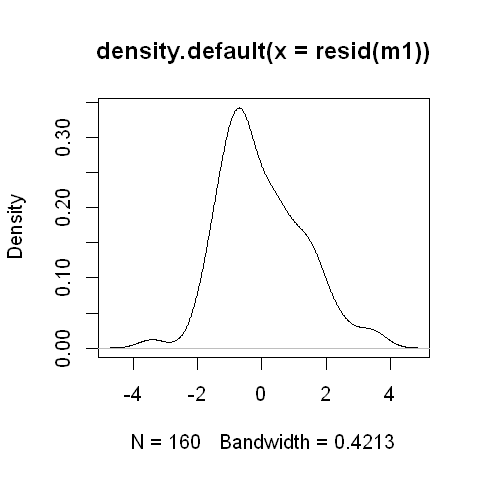

In [64]:
m1 = lmer(epoch_duration_trans ~ group + (1 | rat), data = data[data$ep_type=='pedestal_4',], REML=FALSE)
summary(m1)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))
plot(density(resid(m1)))


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: epoch_duration_trans ~ group + (1 | rat)
   Data: data[data$ep_type == "track", ]

     AIC      BIC   logLik deviance df.resid 
  1111.6   1124.5   -551.8   1103.6      185 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6266 -0.4864 -0.1148  0.2845  5.9268 

Random effects:
 Groups   Name        Variance Std.Dev.
 rat      (Intercept)  8.547   2.924   
 Residual             17.814   4.221   
Number of obs: 189, groups:  rat, 12

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)  26.7978     1.3748 11.4546  19.492 3.84e-10 ***
grouppae     -0.3894     1.8827 10.4570  -0.207     0.84    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.730

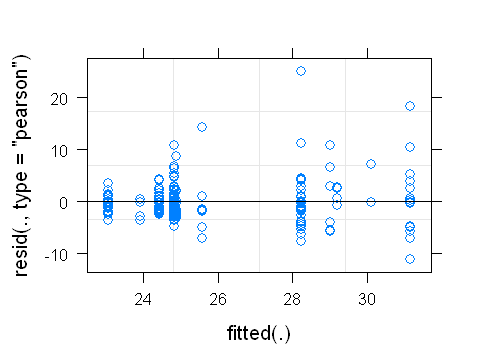

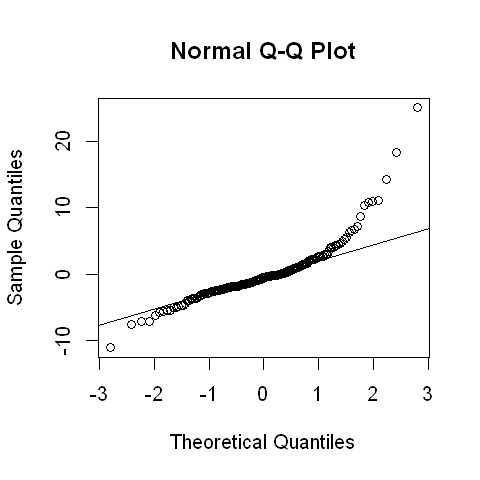

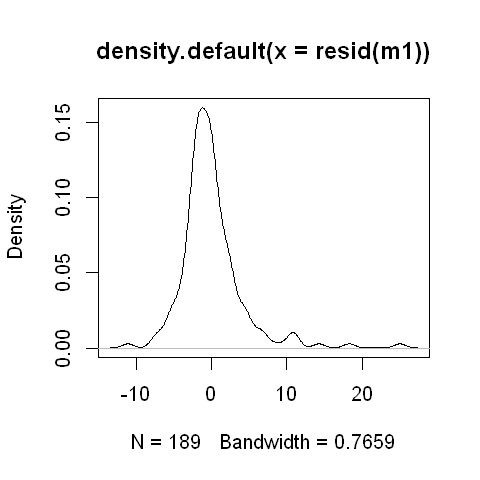

In [65]:
m1 = lmer(epoch_duration_trans ~ group + (1 | rat), data = data[data$ep_type=='track',], REML=FALSE)
summary(m1)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))
plot(density(resid(m1)))


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: epoch_duration_trans ~ group + (1 | rat)
   Data: data[data$ep_type == "cylinder_1", ]

     AIC      BIC   logLik deviance df.resid 
   944.3    956.7   -468.2    936.3      158 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.4698 -0.6073 -0.1488  0.5304  3.1123 

Random effects:
 Groups   Name        Variance Std.Dev.
 rat      (Intercept)  5.59    2.364   
 Residual             17.16    4.142   
Number of obs: 162, groups:  rat, 9

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)  30.1913     1.3495  8.9760  22.372  3.5e-09 ***
grouppae      0.2637     1.7784  8.4959   0.148    0.886    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.759

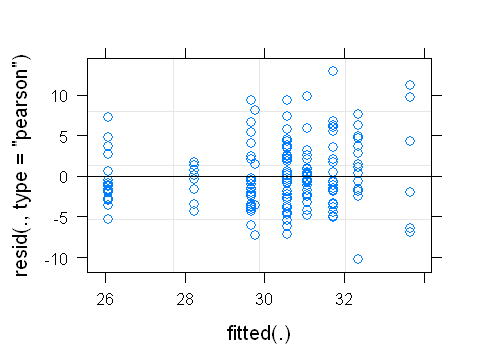

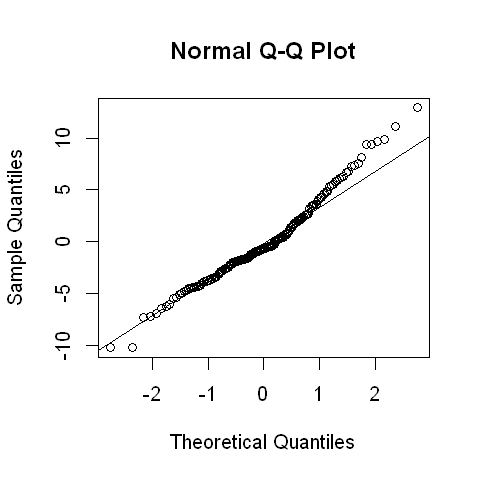

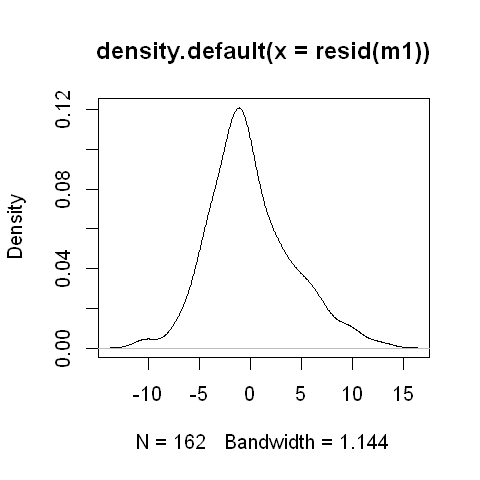

In [66]:
m1 = lmer(epoch_duration_trans ~ group + (1 | rat), data = data[data$ep_type=='cylinder_1',], REML=FALSE)
summary(m1)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))
plot(density(resid(m1)))

Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: epoch_duration_trans ~ group + (1 | rat)
   Data: data[data$ep_type == "cylinder_2", ]

     AIC      BIC   logLik deviance df.resid 
   941.1    953.4   -466.5    933.1      156 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.7448 -0.6467 -0.1516  0.6891  4.2918 

Random effects:
 Groups   Name        Variance Std.Dev.
 rat      (Intercept) 10.08    3.175   
 Residual             17.58    4.193   
Number of obs: 160, groups:  rat, 9

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)  33.2249     1.7254  9.1855  19.257 9.73e-09 ***
grouppae     -0.6016     2.2873  8.8225  -0.263    0.799    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.754

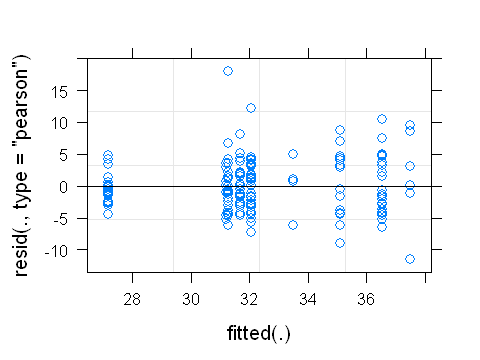

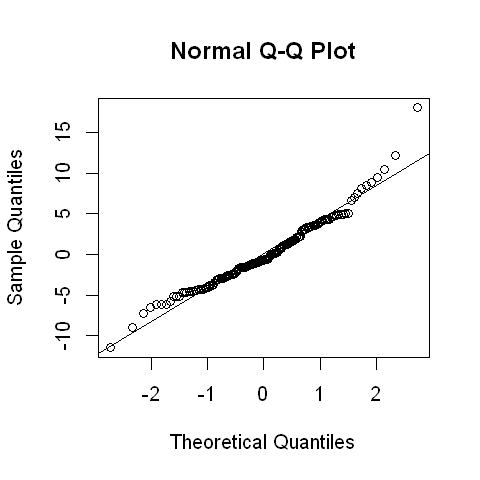

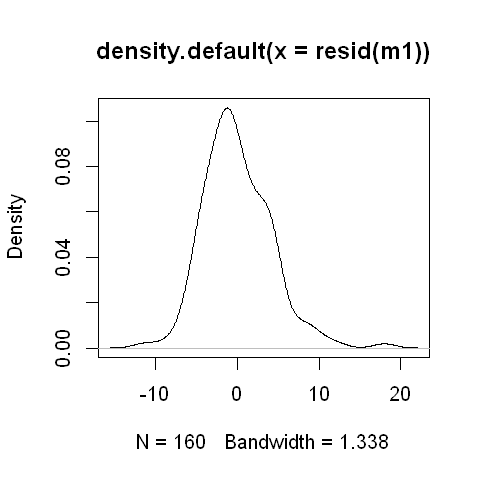

In [67]:
m1 = lmer(epoch_duration_trans ~ group + (1 | rat), data = data[data$ep_type=='cylinder_2',], REML=FALSE)
summary(m1)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))
plot(density(resid(m1)))

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,10,6751.853,6802.729,-3365.927,6731.853,NA,NA,NA
m1,11,6753.832,6809.795,-3365.916,6731.832,0.02138131,1,0.8837449


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: epoch_duration_trans ~ group + ep_type + (1 | rat/session)
   Data: data

     AIC      BIC   logLik deviance df.resid 
  6753.8   6809.8  -3365.9   6731.8     1186 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.2923 -0.5969 -0.0183  0.5239  6.6783 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept)  0.7378  0.8589  
 rat         (Intercept)  1.5380  1.2401  
 Residual                15.2728  3.9080  
Number of obs: 1197, groups:  session:rat, 189; rat, 12

Fixed effects:
                   Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)          6.4732     0.6663   13.0084   9.716  2.5e-07 ***
grouppae            -0.1215     0.8304    8.6977  -0.146    0.887    
ep_typetrack        19.2601     0.4032 1011.0083  47.768  < 2e-16 ***
ep_typepedestal_2    7.6219     0.4112 1017.0766  18.537  < 2e-16 ***
ep_typecyl

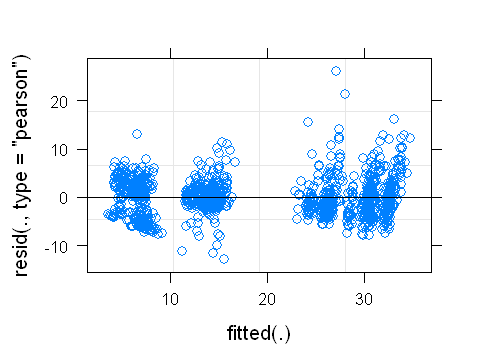

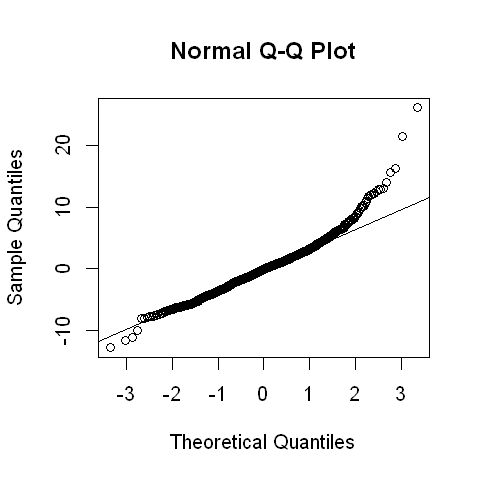

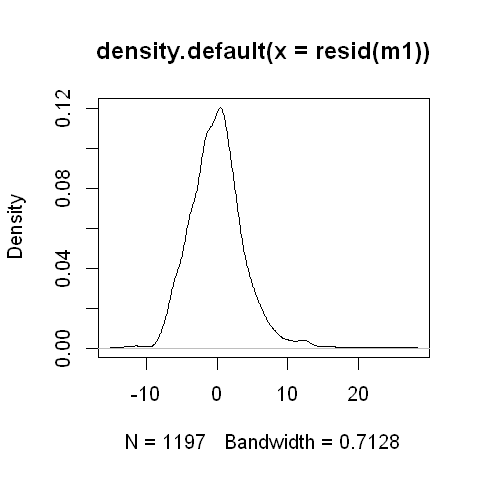

In [42]:
data$epoch_duration_trans = sqrt(data$epoch_duration)

# m1 = lmer(epoch_duration_trans ~ group + ep_type + group:ep_type + (1 | rat/session), data = data, REML=FALSE)
m1 = lmer(epoch_duration_trans ~ group + ep_type + (1 | rat/session), data = data, REML=FALSE)
 
m1.null = lmer(epoch_duration_trans ~ 1 + ep_type + (1 | rat/session), data = data, REML=FALSE)
# anova(m1)
anova(m1.null, m1)  

summary(m1)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))
plot(density(resid(m1)))


In [ ]:
library(emmeans)

# emmeans(m1, list(pairwise ~ group), adjust = "tukey")
# emmeans(m1, list(pairwise ~ group + ep_type), adjust = "tukey")

# emmeans(m1, "group+ep_type")
emmeans(m1, pairwise ~ group + ep_type,adjust = "tukey")


# Replay analysis

In [2]:
replay_df <- read.csv('F:/Projects/PAE_PlaceCell/analysis/replay_nelpy/post_processed/replay_df.csv')
decoding_df <- read.csv('F:/Projects/PAE_PlaceCell/analysis/replay_nelpy/post_processed/decoding_df.csv')
sig_replay_df <- read.csv('F:/Projects/PAE_PlaceCell/analysis/replay_nelpy/post_processed/sig_replay_df.csv')
fr_replay_df <- read.csv('F:/Projects/PAE_PlaceCell/analysis/replay_nelpy/post_processed/fr_replay_df.csv')


replay_df$group = factor(replay_df$group, levels=c('control', 'pae'))
replay_df$rat = factor(replay_df$rat)
replay_df$session = factor(replay_df$session)
replay_df$area = factor(replay_df$area, levels=c('ca1', 'ca3'))
replay_df$replay_type = factor(replay_df$replay_type)

decoding_df$group = factor(decoding_df$group, levels=c('control', 'pae'))
decoding_df$rat = factor(decoding_df$rat)
decoding_df$session = factor(decoding_df$session)
decoding_df$area = factor(decoding_df$area, levels=c('ca1', 'ca3'))

sig_replay_df$group = factor(sig_replay_df$group, levels=c('control', 'pae'))
sig_replay_df$rat = factor(sig_replay_df$rat)
sig_replay_df$session = factor(sig_replay_df$session)
sig_replay_df$area = factor(sig_replay_df$area, levels=c('ca1', 'ca3'))

fr_replay_df$group = factor(fr_replay_df$group, levels=c('control', 'pae'))
fr_replay_df$rat = factor(fr_replay_df$rat)
fr_replay_df$session = factor(fr_replay_df$session)
fr_replay_df$area = factor(fr_replay_df$area, levels=c('ca1', 'ca3'))

print('----------------------------replay_df----------------------------')
summary(replay_df)
print('----------------------------decoding_df----------------------------')
summary(decoding_df)
print('----------------------------sig_replay_df----------------------------')
summary(sig_replay_df)
print('----------------------------fr_replay_df----------------------------')
summary(fr_replay_df)


[1] "----------------------------replay_df----------------------------"


       X           Unnamed..0      start_time          end_time       
 Min.   : 1280   Min.   : 1280   Min.   :   0.458   Min.   :   0.562  
 1st Qu.:32544   1st Qu.:32544   1st Qu.: 738.149   1st Qu.: 738.438  
 Median :37406   Median :37406   Median :1688.785   Median :1689.225  
 Mean   :35186   Mean   :35186   Mean   :1730.255   Mean   :1730.465  
 3rd Qu.:44157   3rd Qu.:44157   3rd Qu.:2562.064   3rd Qu.:2562.249  
 Max.   :60711   Max.   :60711   Max.   :5220.235   Max.   :5220.370  
                                                                      
   peak_time        ripple_duration   area                         session    
 Min.   :   0.504   Min.   :0.0800   ca1:4107   LEM3216_S20190718101925: 541  
 1st Qu.: 738.314   1st Qu.:0.1190   ca3:2523   LEM3216_S20190720145517: 491  
 Median :1689.057   Median :0.1660              LS19_S20170522113749   : 484  
 Mean   :1730.361   Mean   :0.2097              LEM3116_S20180717110938: 467  
 3rd Qu.:2562.200   3rd Qu.:0.2460   

[1] "----------------------------decoding_df----------------------------"


       X                        session    decoding_r2     decoding_r2_pval  
 Min.   :0   LEM3116_S20180717110938: 1   Min.   :0.2724   Min.   :0.000999  
 1st Qu.:0   LEM3116_S20180717203042: 1   1st Qu.:0.5539   1st Qu.:0.000999  
 Median :0   LEM3116_S20180718184628: 1   Median :0.7428   Median :0.000999  
 Mean   :0   LEM3116_S20180802100324: 1   Mean   :0.6901   Mean   :0.001016  
 3rd Qu.:0   LEM3116_S20180803103321: 1   3rd Qu.:0.8261   3rd Qu.:0.000999  
 Max.   :0   LEM3116_S20180806104145: 1   Max.   :0.9616   Max.   :0.001998  
             (Other)                :52                                      
 decoding_median_error  total_units     area        group         rat    
 Min.   : 3.433        Min.   :10.00   ca1:21   control:21   LEM3116: 9  
 1st Qu.: 5.539        1st Qu.:15.00   ca3:37   pae    :37   LEM3120: 1  
 Median : 6.667        Median :19.50                         LEM3124: 6  
 Mean   : 8.753        Mean   :22.14                         LEM3206:18  
 3rd Q

[1] "----------------------------sig_replay_df----------------------------"


       X                            session        rat         group   
 Min.   : 0.00   LEM3116_S20180717110938: 1   LEM3116: 9   control:21  
 1st Qu.:14.25   LEM3116_S20180717203042: 1   LEM3120: 1   pae    :37  
 Median :28.50   LEM3116_S20180718184628: 1   LEM3124: 6               
 Mean   :28.50   LEM3116_S20180802100324: 1   LEM3206:18               
 3rd Qu.:42.75   LEM3116_S20180803103321: 1   LEM3216:11               
 Max.   :57.00   LEM3116_S20180806104145: 1   LEM3246: 4               
                 (Other)                :52   LS19   : 9               
  area       prop_sig          n_events    
 ca1:21   Min.   :0.00000   Min.   :  1.0  
 ca3:37   1st Qu.:0.07143   1st Qu.: 14.0  
          Median :0.11853   Median : 53.0  
          Mean   :0.20326   Mean   :114.3  
          3rd Qu.:0.20443   3rd Qu.:164.5  
          Max.   :1.00000   Max.   :541.0  
                                           

[1] "----------------------------fr_replay_df----------------------------"


       X                         session        rat        group     area   
 Min.   : 0   LEM3116_S20180717110938: 1   LEM3116:5   control:14   ca1:15  
 1st Qu.: 7   LEM3116_S20180717203042: 1   LEM3120:1   pae    :15   ca3:14  
 Median :14   LEM3116_S20180718184628: 1   LEM3124:2                        
 Mean   :14   LEM3116_S20180803103321: 1   LEM3206:7                        
 3rd Qu.:21   LEM3116_S20180808160117: 1   LEM3216:8                        
 Max.   :28   LEM3120_S20181007151036: 1   LS19   :6                        
              (Other)                :23                                    
  prop_forward     prop_reverse       n_events     
 Min.   :0.0000   Min.   :0.0000   Min.   : 1.000  
 1st Qu.:0.5000   1st Qu.:0.0000   1st Qu.: 1.000  
 Median :0.5625   Median :0.4375   Median : 4.000  
 Mean   :0.6021   Mean   :0.3979   Mean   : 5.828  
 3rd Qu.:1.0000   3rd Qu.:0.5000   3rd Qu.: 6.000  
 Max.   :1.0000   Max.   :1.0000   Max.   :38.000  
                    

## Bayesian replay score

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,118.7574,136.7565,-55.37868,110.7574,NA,NA,NA
m1,5,120.6658,143.1647,-55.33290,110.6658,0.09155272,1,0.7622124


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: trajectory_score_trans ~ group + (1 | rat/session)
   Data: temp_df[temp_df$area == "ca1", ]

     AIC      BIC   logLik deviance df.resid 
   120.7    143.2    -55.3    110.7      660 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.37785 -0.67041 -0.04614  0.65199  2.82912 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.033011 0.18169 
 rat         (Intercept) 0.002722 0.05217 
 Residual                0.064265 0.25351 
Number of obs: 665, groups:  session:rat, 19; rat, 5

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept) -0.95734    0.07931  5.26979 -12.071 4.86e-05 ***
grouppae     0.03678    0.10577  2.43744   0.348    0.756    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.750

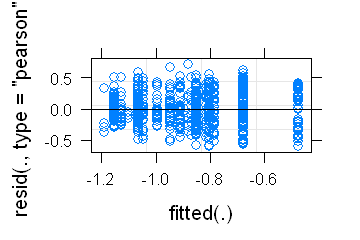

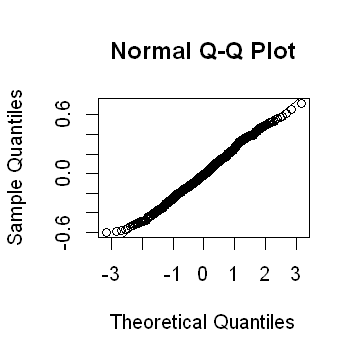

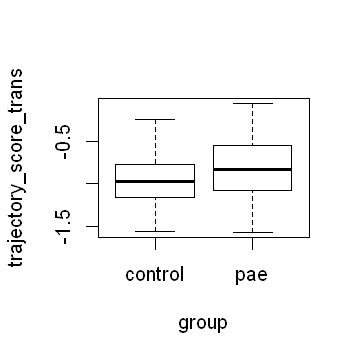

In [3]:
temp_df = replay_df[replay_df$significant_replay == "True",]

temp_df$trajectory_score_trans = log(temp_df$trajectory_score)

m1 = lmer(trajectory_score_trans ~ group + (1 | rat/session), data = temp_df[temp_df$area == "ca1",],REML=FALSE)
m1.null = lmer(trajectory_score_trans ~ 1 + (1 | rat/session), data = temp_df[temp_df$area == "ca1",], REML=FALSE)
anova(m1.null, m1)  
summary(m1)
options(repr.plot.width = 3, repr.plot.height = 2)

plot(m1)
options(repr.plot.width = 3, repr.plot.height = 3)
qqnorm(resid(m1)) 
qqline(resid(m1))

plot(trajectory_score_trans ~ group, data = temp_df[temp_df$area == "ca1",])

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,155.2708,170.645,-73.63541,147.2708,NA,NA,NA
m1,5,156.8273,176.045,-73.41366,146.8273,0.4434992,1,0.5054384


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: trajectory_score_trans ~ group + (1 | rat/session)
   Data: temp_df[temp_df$area == "ca3", ]

     AIC      BIC   logLik deviance df.resid 
   156.8    176.0    -73.4    146.8      340 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-3.07347 -0.66975 -0.04147  0.63148  3.05863 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.027505 0.16585 
 rat         (Intercept) 0.005172 0.07192 
 Residual                0.079590 0.28212 
Number of obs: 345, groups:  session:rat, 31; rat, 5

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)   
(Intercept) -1.02078    0.07770  2.82193 -13.137  0.00129 **
grouppae     0.08386    0.10793  2.42153   0.777  0.50588   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.720

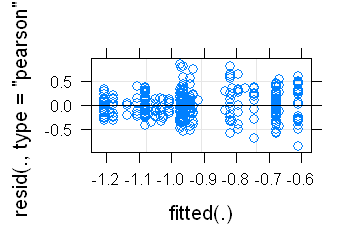

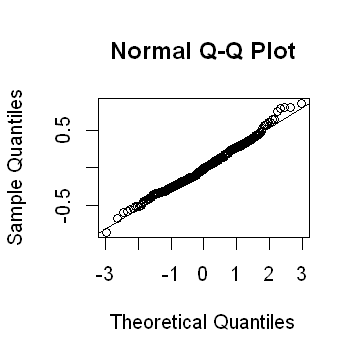

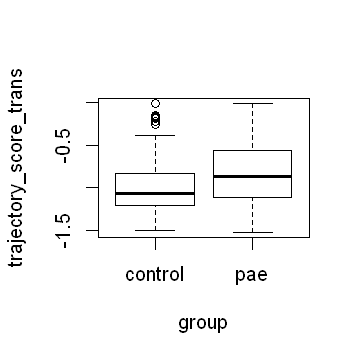

In [4]:
temp_df = replay_df[replay_df$significant_replay == "True",]

temp_df$trajectory_score_trans = log(temp_df$trajectory_score)

m1 = lmer(trajectory_score_trans ~ group + (1 | rat/session), data = temp_df[temp_df$area == "ca3",],REML=FALSE)
m1.null = lmer(trajectory_score_trans ~ 1 + (1 | rat/session), data = temp_df[temp_df$area == "ca3",], REML=FALSE)
anova(m1.null, m1)  
summary(m1)
options(repr.plot.width = 3, repr.plot.height = 2)

plot(m1)
options(repr.plot.width = 3, repr.plot.height = 3)
qqnorm(resid(m1)) 
qqline(resid(m1))

plot(trajectory_score_trans ~ group, data = temp_df[temp_df$area == "ca3",])

##  $R^2$ to posterior probability matrix

In [ ]:
temp_df = replay_df[replay_df$significant_replay == "True",]

temp_df$r_squared_trans = temp_df$r_squared + 1

m1 = lm(r_squared_trans ~ group, data = temp_df[temp_df$area == "ca1",])
options(repr.plot.width = 3, repr.plot.height = 3)

boxcox.list <- boxcox(m1,seq(-5, 2, by = 0.5))
trans_factor = boxcox.list$x[which.max(boxcox.list$y)]
temp_df$r_squared_trans = temp_df$r_squared_trans^trans_factor


m1 = lmer(r_squared_trans ~ group + (1 | rat/session), data = temp_df[temp_df$area == "ca1",],REML=FALSE)
m1.null = lmer(r_squared_trans ~ 1 + (1 | rat/session), data = temp_df[temp_df$area == "ca1",], REML=FALSE)
anova(m1.null, m1)  
summary(m1)
options(repr.plot.width = 3, repr.plot.height = 2)

plot(m1)
options(repr.plot.width = 3, repr.plot.height = 3)
qqnorm(resid(m1)) 
qqline(resid(m1))

plot(r_squared_trans ~ group, data = temp_df[temp_df$area == "ca1",])

In [ ]:
# temp_df = replay_df[replay_df$significant_replay == "True",]

m1 = lmer(r_squared_trans ~ group + (1 | rat/session), data = temp_df[temp_df$area == "ca3",],REML=FALSE)
m1.null = lmer(r_squared_trans ~ 1 + (1 | rat/session), data = temp_df[temp_df$area == "ca3",], REML=FALSE)
anova(m1.null, m1)  
summary(m1)
options(repr.plot.width = 3, repr.plot.height = 2)

plot(m1)
options(repr.plot.width = 3, repr.plot.height = 3)
qqnorm(resid(m1)) 
qqline(resid(m1))

plot(r_squared_trans ~ group, data = temp_df[temp_df$area == "ca3",])

## Trajectory distance (cm/sec)

boundary (singular) fit: see ?isSingular


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,1970.343,1988.342,-981.1713,1962.343,NA,NA,NA
m1,5,1972.244,1994.743,-981.1221,1962.244,0.09847737,1,0.7536646


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: traj_dist_trans ~ group + (1 | rat/session)
   Data: temp_df[temp_df$area == "ca1", ]

     AIC      BIC   logLik deviance df.resid 
  1972.2   1994.7   -981.1   1962.2      660 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.8971 -0.5583  0.1595  0.7262  1.9498 

Random effects:
 Groups      Name        Variance  Std.Dev. 
 session:rat (Intercept) 1.301e-01 0.3606289
 rat         (Intercept) 6.505e-10 0.0000255
 Residual                1.076e+00 1.0373759
Number of obs: 665, groups:  session:rat, 19; rat, 5

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)  3.05470    0.15586 15.42845  19.599 2.55e-12 ***
grouppae    -0.06812    0.20461 17.98188  -0.333    0.743    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.762
optimizer (nloptwrap) conv

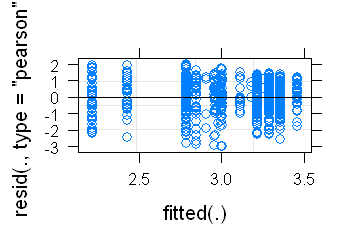

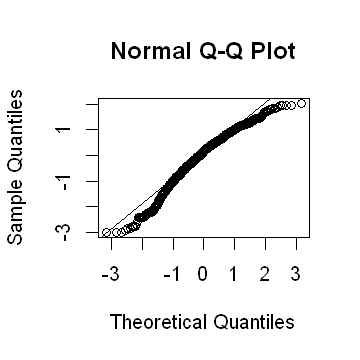

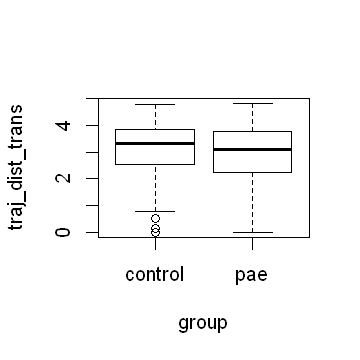

In [7]:
temp_df = replay_df[replay_df$significant_replay == "True",]

# temp_df = temp_df[temp_df$traj_dist != 0,]

# m1 = lm(traj_dist ~ group, data = temp_df[temp_df$area == "ca1",])
# # plot(m1)
# boxcox.list <- boxcox(m1,seq(-2, 2, by = 0.5))
# trans_factor = boxcox.list$x[which.max(boxcox.list$y)]

# temp_df$traj_dist_trans = temp_df$traj_dist^trans_factor
temp_df$traj_dist_trans = log(temp_df$traj_dist+1)


m1 = lmer(traj_dist_trans ~ group + (1 | rat/session), data = temp_df[temp_df$area == "ca1",],REML=FALSE)
m1.null = lmer(traj_dist_trans ~ 1 + (1 | rat/session), data = temp_df[temp_df$area == "ca1",], REML=FALSE)
anova(m1.null, m1)  
summary(m1)
options(repr.plot.width = 3, repr.plot.height = 2)

plot(m1)
options(repr.plot.width = 3, repr.plot.height = 3)
qqnorm(resid(m1)) 
qqline(resid(m1))

plot(traj_dist_trans ~ group, data = temp_df[temp_df$area == "ca1",])

boundary (singular) fit: see ?isSingular


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,1006.550,1021.924,-499.2749,998.5497,NA,NA,NA
m1,5,1007.932,1027.150,-498.9660,997.9320,0.6177583,1,0.4318815


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: traj_dist_trans ~ group + (1 | rat/session)
   Data: temp_df[temp_df$area == "ca3", ]

     AIC      BIC   logLik deviance df.resid 
  1007.9   1027.1   -499.0    997.9      340 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.0143 -0.6883  0.1409  0.7265  2.1030 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.0557   0.236   
 rat         (Intercept) 0.0000   0.000   
 Residual                1.0192   1.010   
Number of obs: 345, groups:  session:rat, 31; rat, 5

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)   2.9804     0.1175 16.2178  25.356 1.77e-14 ***
grouppae     -0.2846     0.1586 18.3992  -1.795   0.0891 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.741
optimizer (nloptwrap) convergence cod

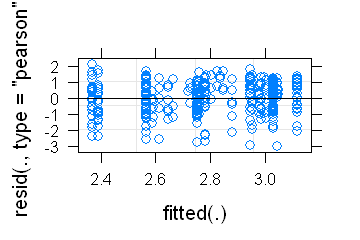

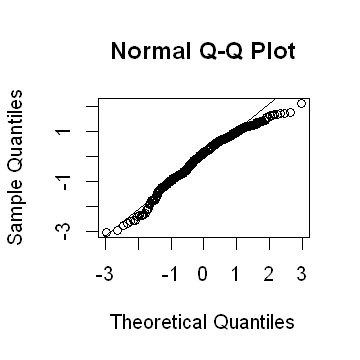

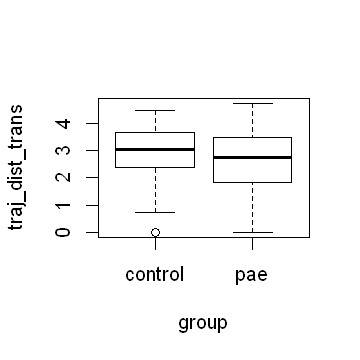

In [8]:
temp_df = replay_df[replay_df$significant_replay == "True",]

# temp_df = temp_df[temp_df$traj_dist != 0,]

# m1 = lm(traj_dist ~ group, data = temp_df[temp_df$area == "ca3",])
# # plot(m1)
# boxcox.list <- boxcox(m1,seq(-2, 2, by = 0.5))
# trans_factor = boxcox.list$x[which.max(boxcox.list$y)]

# temp_df$traj_dist_trans = temp_df$traj_dist^trans_factor
temp_df$traj_dist_trans = log(temp_df$traj_dist+1)


m1 = lmer(traj_dist_trans ~ group + (1 | rat/session), data = temp_df[temp_df$area == "ca3",],REML=FALSE)
m1.null = lmer(traj_dist_trans ~ 1 + (1 | rat/session), data = temp_df[temp_df$area == "ca3",], REML=FALSE)
anova(m1.null, m1)  
summary(m1)
options(repr.plot.width = 3, repr.plot.height = 2)

plot(m1)
options(repr.plot.width = 3, repr.plot.height = 3)
qqnorm(resid(m1)) 
qqline(resid(m1))

plot(traj_dist_trans ~ group, data = temp_df[temp_df$area == "ca3",])

## trajectory speed (cm/sec)

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,2035.881,2053.880,-1013.94,2027.881,NA,NA,NA
m1,5,2037.599,2060.098,-1013.80,2027.599,0.2816776,1,0.5956037


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: traj_speed_trans ~ group + (1 | rat/session)
   Data: temp_df[temp_df$area == "ca1", ]

     AIC      BIC   logLik deviance df.resid 
  2037.6   2060.1  -1013.8   2027.6      660 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.7739 -0.6569  0.1396  0.7254  2.0991 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.11520  0.3394  
 rat         (Intercept) 0.02916  0.1708  
 Residual                1.18814  1.0900  
Number of obs: 665, groups:  session:rat, 19; rat, 5

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)   5.0761     0.1825  3.9853  27.816 1.03e-05 ***
grouppae     -0.1753     0.2590  2.4749  -0.677    0.556    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.705

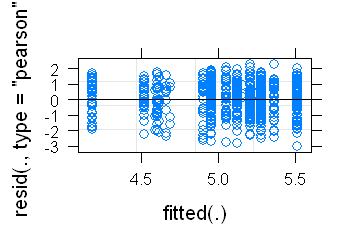

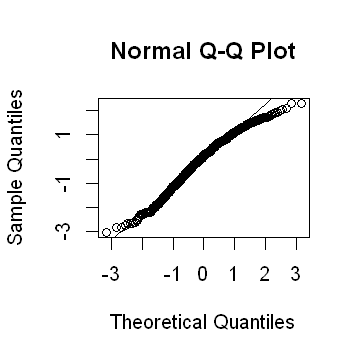

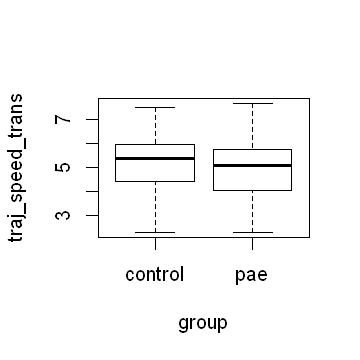

In [9]:
temp_df = replay_df[replay_df$significant_replay == "True",]

temp_df$traj_speed_trans = log(temp_df$traj_speed+10)

m1 = lmer(traj_speed_trans ~ group + (1 | rat/session), data = temp_df[temp_df$area == "ca1",],REML=FALSE)
m1.null = lmer(traj_speed_trans ~ 1 + (1 | rat/session), data = temp_df[temp_df$area == "ca1",], REML=FALSE)
anova(m1.null, m1)  
summary(m1)
options(repr.plot.width = 3, repr.plot.height = 2)

plot(m1)
options(repr.plot.width = 3, repr.plot.height = 3)
qqnorm(resid(m1)) 
qqline(resid(m1))

plot(traj_speed_trans ~ group, data = temp_df[temp_df$area == "ca1",])

boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,979.0919,994.4661,-485.5459,971.0919,NA,NA,NA
m1,5,979.6665,998.8842,-484.8332,969.6665,1.42538,1,0.2325199


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: traj_speed_trans ~ group + (1 | rat/session)
   Data: temp_df[temp_df$area == "ca3", ]

     AIC      BIC   logLik deviance df.resid 
   979.7    998.9   -484.8    969.7      340 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.72519 -0.64467 -0.03131  0.75865  2.22433 

Random effects:
 Groups      Name        Variance  Std.Dev. 
 session:rat (Intercept) 7.008e-02 2.647e-01
 rat         (Intercept) 9.937e-17 9.968e-09
 Residual                9.305e-01 9.646e-01
Number of obs: 345, groups:  session:rat, 31; rat, 5

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)   4.4325     0.1216 17.9154  36.438   <2e-16 ***
grouppae      0.1952     0.1633 20.2680   1.195    0.246    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.745
optimizer (nloptwr

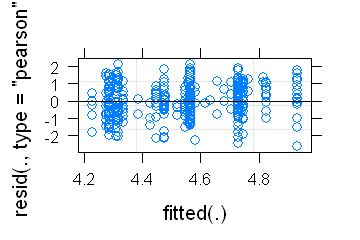

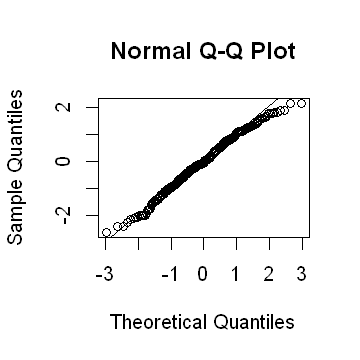

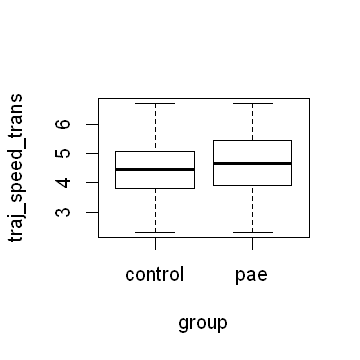

In [10]:
temp_df = replay_df[replay_df$significant_replay == "True",]
temp_df$traj_speed_trans = log(temp_df$traj_speed+10)


m1 = lmer(traj_speed_trans ~ group + (1 | rat/session), data = temp_df[temp_df$area == "ca3",],REML=FALSE)
m1.null = lmer(traj_speed_trans ~ 1 + (1 | rat/session), data = temp_df[temp_df$area == "ca3",], REML=FALSE)
anova(m1.null, m1)  
summary(m1)
options(repr.plot.width = 3, repr.plot.height = 2)

plot(m1)
options(repr.plot.width = 3, repr.plot.height = 3)
qqnorm(resid(m1)) 
qqline(resid(m1))

plot(traj_speed_trans ~ group, data = temp_df[temp_df$area == "ca3",])

## trajectory step size (cm)

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,1605.070,1623.069,-798.535,1597.070,NA,NA,NA
m1,5,1606.642,1629.141,-798.321,1596.642,0.427876,1,0.513033


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: traj_step_log ~ group + (1 | rat/session)
   Data: temp_df[temp_df$area == "ca1", ]

     AIC      BIC   logLik deviance df.resid 
  1606.6   1629.1   -798.3   1596.6      660 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.28003 -0.77817  0.02759  0.70228  2.58829 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.055907 0.23645 
 rat         (Intercept) 0.006267 0.07917 
 Residual                0.623388 0.78955 
Number of obs: 665, groups:  session:rat, 19; rat, 5

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)   1.5425     0.1158  3.3146  13.325 0.000541 ***
grouppae     -0.1508     0.1599  1.6829  -0.943 0.460656    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.724

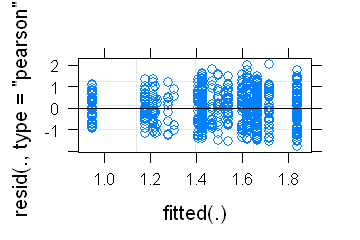

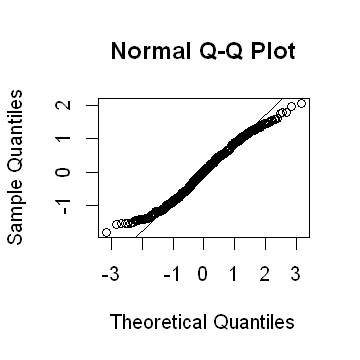

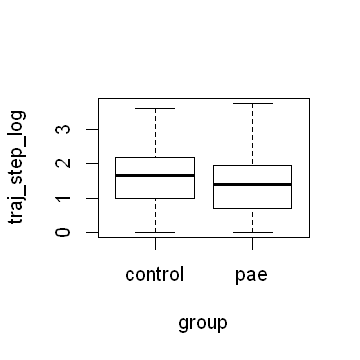

In [44]:
temp_df = replay_df[replay_df$significant_replay == "True",]

temp_df$traj_step_log = log(temp_df$traj_step+1)

m1 = lmer(traj_step_log ~ group + (1 | rat/session), data = temp_df[temp_df$area == "ca1",],REML=FALSE)
m1.null = lmer(traj_step_log ~ 1 + (1 | rat/session), data = temp_df[temp_df$area == "ca1",], REML=FALSE)
anova(m1.null, m1)  
summary(m1)
options(repr.plot.width = 3, repr.plot.height = 2)

plot(m1)
options(repr.plot.width = 3, repr.plot.height = 3)
qqnorm(resid(m1)) 
qqline(resid(m1))

plot(traj_step_log ~ group, data = temp_df[temp_df$area == "ca1",])

boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,711.3598,726.7340,-351.6799,703.3598,NA,NA,NA
m1,5,711.0612,730.2789,-350.5306,701.0612,2.298626,1,0.1294885


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: traj_step_log ~ group + (1 | rat/session)
   Data: temp_df[temp_df$area == "ca3", ]

     AIC      BIC   logLik deviance df.resid 
   711.1    730.3   -350.5    701.1      340 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.2311 -0.7403 -0.1528  0.7079  2.6740 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.03612  0.1900  
 rat         (Intercept) 0.00000  0.0000  
 Residual                0.42553  0.6523  
Number of obs: 345, groups:  session:rat, 31; rat, 5

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)  1.03822    0.08494 15.31016  12.224 2.65e-09 ***
grouppae     0.17318    0.11381 17.33981   1.522    0.146    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.746
optimizer (nloptwrap) convergence co

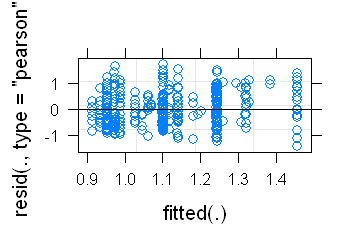

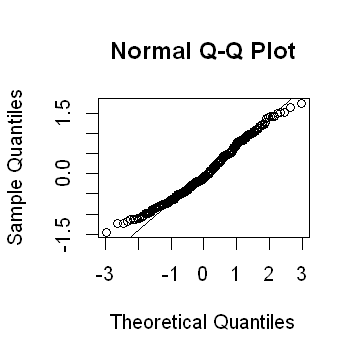

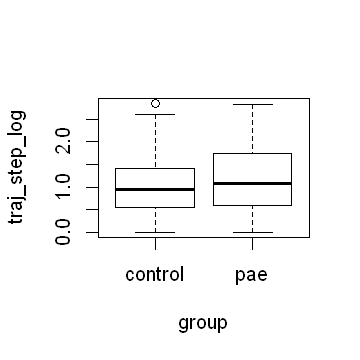

In [45]:
temp_df = replay_df[replay_df$significant_replay == "True",]

temp_df$traj_step_log = log(temp_df$traj_step+1)

m1 = lmer(traj_step_log ~ group + (1 | rat/session), data = temp_df[temp_df$area == "ca3",],REML=FALSE)
m1.null = lmer(traj_step_log ~ 1 + (1 | rat/session), data = temp_df[temp_df$area == "ca3",], REML=FALSE)
anova(m1.null, m1)  
summary(m1)
options(repr.plot.width = 3, repr.plot.height = 2)

plot(m1)
options(repr.plot.width = 3, repr.plot.height = 3)
qqnorm(resid(m1)) 
qqline(resid(m1))

plot(traj_step_log ~ group, data = temp_df[temp_df$area == "ca3",])

## Distance from the start of the trajectory to the rat's current position

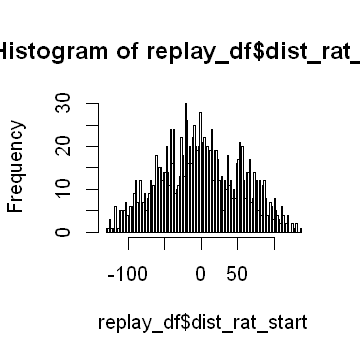

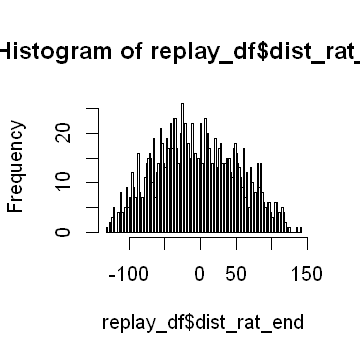

In [13]:
# library('mclust')

# gmm.mclust <- Mclust(replay_df$dist_rat_start+100, 2, na.rm = TRUE)

hist(replay_df$dist_rat_start,100)

hist(replay_df$dist_rat_end,100)

boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,1978.083,1991.071,-985.0413,1970.083,NA,NA,NA
m1,5,1980.052,1996.287,-985.0259,1970.052,0.03074368,1,0.8608134


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: dist_rat_start_trans ~ group + (1 | rat/session)
   Data: temp_df[temp_df$area == "ca1", ]

     AIC      BIC   logLik deviance df.resid 
  1980.1   1996.3   -985.0   1970.1      185 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.93363 -0.52883  0.00288  0.54743  2.61818 

Random effects:
 Groups      Name        Variance  Std.Dev. 
 session:rat (Intercept) 3.407e+02 1.846e+01
 rat         (Intercept) 6.088e-14 2.467e-07
 Residual                1.716e+03 4.143e+01
Number of obs: 190, groups:  session:rat, 16; rat, 5

Fixed effects:
            Estimate Std. Error     df t value Pr(>|t|)
(Intercept)   -8.643      9.074 12.448  -0.953    0.359
grouppae       2.192     12.341 12.671   0.178    0.862

Correlation of Fixed Effects:
         (Intr)
grouppae -0.735
optimizer (nloptwrap) convergence code: 0 (OK)
boundary (singular) fit: see ?isSingular


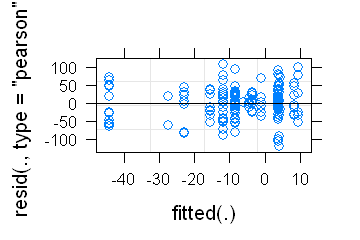

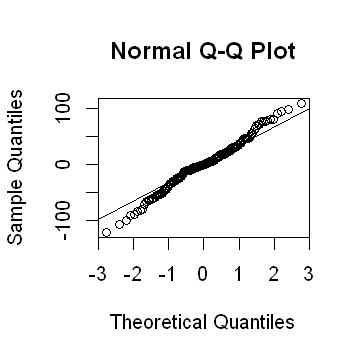

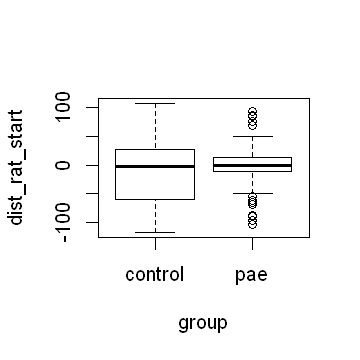

In [14]:
temp_df = replay_df[replay_df$significant_replay == "True",]

# # odd distribution here, so used boxcox to identify factor
# m1 = lm(dist_rat_start ~ group, data = temp_df[temp_df$area == "ca1",])
# # plot(m1)
# boxcox.list <- boxcox(m1)
# trans_factor = boxcox.list$x[which.max(boxcox.list$y)]

# temp_df$dist_rat_start_trans = temp_df$dist_rat_start^trans_factor
temp_df$dist_rat_start_trans = temp_df$dist_rat_start

m1 = lmer(dist_rat_start_trans ~ group + (1 | rat/session), data = temp_df[temp_df$area == "ca1",],REML=FALSE)
m1.null = lmer(dist_rat_start_trans ~ 1 + (1 | rat/session), data = temp_df[temp_df$area == "ca1",], REML=FALSE)
anova(m1.null, m1)  
summary(m1)
options(repr.plot.width = 3, repr.plot.height = 2)

plot(m1)
options(repr.plot.width = 3, repr.plot.height = 3)
qqnorm(resid(m1)) 
qqline(resid(m1))

plot(dist_rat_start ~ group, data = temp_df[temp_df$area == "ca1",])

boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,824.8364,834.1064,-408.4182,816.8364,NA,NA,NA
m1,5,826.8306,838.4180,-408.4153,816.8306,0.005806636,1,0.939259


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: dist_rat_start_trans ~ group + (1 | rat/session)
   Data: temp_df[temp_df$area == "ca3", ]

     AIC      BIC   logLik deviance df.resid 
   826.8    838.4   -408.4    816.8       70 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.0384 -0.7321 -0.1339  0.9082  1.9030 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept)  825.3   28.73   
 rat         (Intercept)    0.0    0.00   
 Residual                2653.6   51.51   
Number of obs: 75, groups:  session:rat, 20; rat, 4

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)
(Intercept)  -0.8707    14.3448 14.2426  -0.061    0.952
grouppae      1.5127    19.8496 17.4954   0.076    0.940

Correlation of Fixed Effects:
         (Intr)
grouppae -0.723
optimizer (nloptwrap) convergence code: 0 (OK)
boundary (singular) fit: see ?isSingular


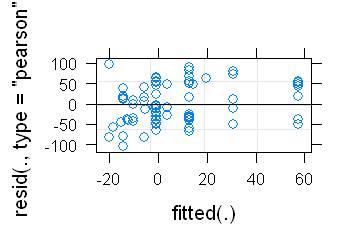

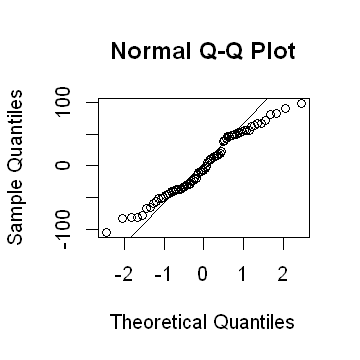

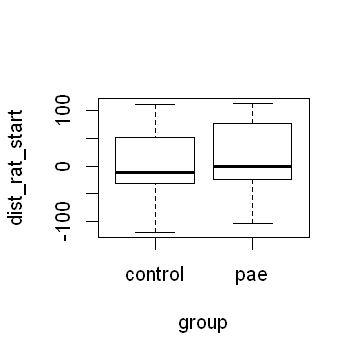

In [15]:
temp_df = replay_df[replay_df$significant_replay == "True",]

# # odd distribution here, so used boxcox to identify factor
# m1 = lm(dist_rat_start ~ group, data = temp_df[temp_df$area == "ca3",])
# # plot(m1)
# boxcox.list <- boxcox(m1)
# trans_factor = boxcox.list$x[which.max(boxcox.list$y)]

# temp_df$dist_rat_start_trans = temp_df$dist_rat_start^trans_factor
temp_df$dist_rat_start_trans = temp_df$dist_rat_start

m1 = lmer(dist_rat_start_trans ~ group + (1 | rat/session), data = temp_df[temp_df$area == "ca3",],REML=FALSE)
m1.null = lmer(dist_rat_start_trans ~ 1 + (1 | rat/session), data = temp_df[temp_df$area == "ca3",], REML=FALSE)
anova(m1.null, m1)  
summary(m1)
options(repr.plot.width = 3, repr.plot.height = 2)

plot(m1)
options(repr.plot.width = 3, repr.plot.height = 3)
qqnorm(resid(m1)) 
qqline(resid(m1))

plot(dist_rat_start ~ group, data = temp_df[temp_df$area == "ca3",])

## Distance from the end of the trajectory to the rat's current position

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,2046.960,2059.948,-1019.480,2038.960,NA,NA,NA
m1,5,2048.906,2065.141,-1019.453,2038.906,0.05403917,1,0.8161782


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: dist_rat_end_trans ~ group + (1 | rat/session)
   Data: temp_df[temp_df$area == "ca1", ]

     AIC      BIC   logLik deviance df.resid 
  2048.9   2065.1  -1019.5   2038.9      185 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.3030 -0.5329  0.1062  0.6086  2.3812 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept)   37.58   6.13   
 rat         (Intercept)  322.49  17.96   
 Residual                2549.06  50.49   
Number of obs: 190, groups:  session:rat, 16; rat, 5

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)
(Intercept)  -10.147     12.468   3.672  -0.814    0.465
grouppae       5.360     18.833   2.986   0.285    0.795

Correlation of Fixed Effects:
         (Intr)
grouppae -0.662

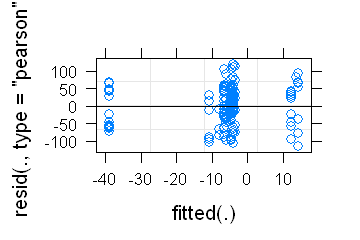

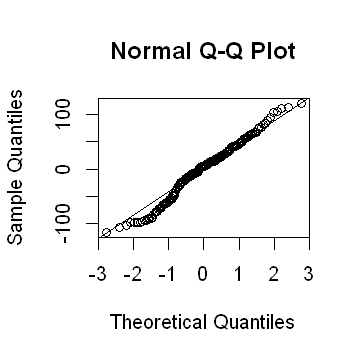

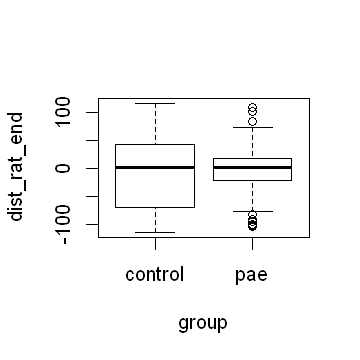

In [16]:
temp_df = replay_df[replay_df$significant_replay == "True",]

# # odd distribution here, so used boxcox to identify factor
# m1 = lm(dist_rat_end ~ group, data = temp_df[temp_df$area == "ca1",])
# # plot(m1)
# boxcox.list <- boxcox(m1)
# trans_factor = boxcox.list$x[which.max(boxcox.list$y)]

# temp_df$dist_rat_end_trans = temp_df$dist_rat_end^trans_factor
temp_df$dist_rat_end_trans = temp_df$dist_rat_end

m1 = lmer(dist_rat_end_trans ~ group + (1 | rat/session), data = temp_df[temp_df$area == "ca1",],REML=FALSE)
m1.null = lmer(dist_rat_end_trans ~ 1 + (1 | rat/session), data = temp_df[temp_df$area == "ca1",], REML=FALSE)
anova(m1.null, m1)  
summary(m1)
options(repr.plot.width = 3, repr.plot.height = 2)

plot(m1)
options(repr.plot.width = 3, repr.plot.height = 3)
qqnorm(resid(m1)) 
qqline(resid(m1))

plot(dist_rat_end ~ group, data = temp_df[temp_df$area == "ca1",])

boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,834.8619,844.1319,-413.4310,826.8619,NA,NA,NA
m1,5,836.7562,848.3436,-413.3781,826.7562,0.1057421,1,0.7450448


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: dist_rat_end_trans ~ group + (1 | rat/session)
   Data: temp_df[temp_df$area == "ca3", ]

     AIC      BIC   logLik deviance df.resid 
   836.8    848.3   -413.4    826.8       70 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.6155 -0.9441  0.2015  0.7657  1.8251 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 1116     33.40   
 rat         (Intercept)    0      0.00   
 Residual                2962     54.42   
Number of obs: 75, groups:  session:rat, 20; rat, 4

Fixed effects:
            Estimate Std. Error     df t value Pr(>|t|)
(Intercept)   -4.295     16.044 11.546  -0.268    0.794
grouppae       7.188     22.087 13.832   0.325    0.750

Correlation of Fixed Effects:
         (Intr)
grouppae -0.726
optimizer (nloptwrap) convergence code: 0 (OK)
boundary (singular) fit: see ?isSingular


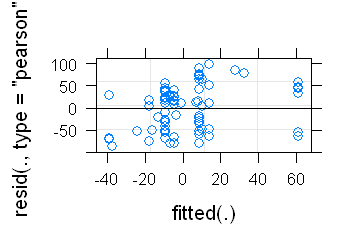

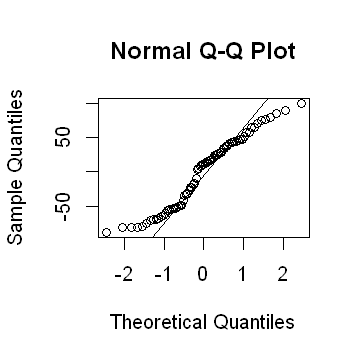

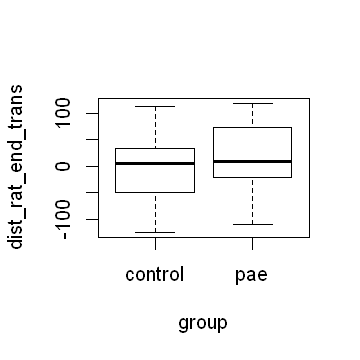

In [17]:
temp_df = replay_df[replay_df$significant_replay == "True",]

# # odd distribution here, so used boxcox to identify factor
# m1 = lm(dist_rat_end ~ group, data = temp_df[temp_df$area == "ca3",])
# # plot(m1)
# boxcox.list <- boxcox(m1)
# trans_factor = boxcox.list$x[which.max(boxcox.list$y)]

# temp_df$dist_rat_end_trans = temp_df$dist_rat_end^trans_factor
temp_df$dist_rat_end_trans = temp_df$dist_rat_end

m1 = lmer(dist_rat_end_trans ~ group + (1 | rat/session), data = temp_df[temp_df$area == "ca3",],REML=FALSE)
m1.null = lmer(dist_rat_end_trans ~ 1 + (1 | rat/session), data = temp_df[temp_df$area == "ca3",], REML=FALSE)
anova(m1.null, m1)  
summary(m1)
options(repr.plot.width = 3, repr.plot.height = 2)

plot(m1)
options(repr.plot.width = 3, repr.plot.height = 3)
qqnorm(resid(m1)) 
qqline(resid(m1))

plot(dist_rat_end_trans ~ group, data = temp_df[temp_df$area == "ca3",])

## decoding_R^2

boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,3,-21.48198,-18.34841,13.74099,-27.48198,NA,NA,NA
m1,4,-21.07849,-16.90040,14.53924,-29.07849,1.596506,1,0.206399


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: decoding_r2 ~ group + (1 | rat)
   Data: decoding_df[decoding_df$area == "ca1", ]

     AIC      BIC   logLik deviance df.resid 
   -21.1    -16.9     14.5    -29.1       17 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.8297 -0.1754  0.2971  0.5560  1.4392 

Random effects:
 Groups   Name        Variance Std.Dev.
 rat      (Intercept) 0.00000  0.0000  
 Residual             0.01466  0.1211  
Number of obs: 21, groups:  rat, 5

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)  0.76747    0.04281 21.00000  17.928  3.3e-14 ***
grouppae     0.07008    0.05441 21.00000   1.288    0.212    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.787
optimizer (nloptwrap) convergence code: 0 (OK)
boundary (singular) fit: see ?isSingular


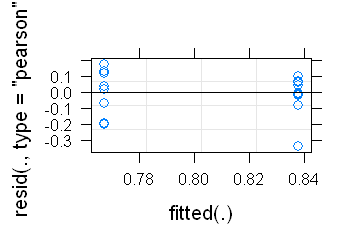

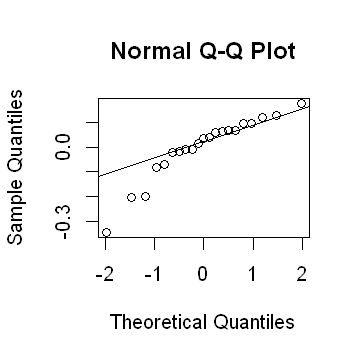

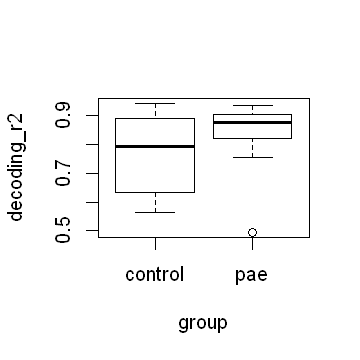

In [18]:
m1 = lmer(decoding_r2 ~ group + (1 | rat), data = decoding_df[decoding_df$area == "ca1",],REML=FALSE)
m1.null = lmer(decoding_r2 ~ 1 + (1 | rat), data = decoding_df[decoding_df$area == "ca1",], REML=FALSE)

anova(m1.null, m1)  
summary(m1)
options(repr.plot.width = 3, repr.plot.height = 2)

plot(m1)
options(repr.plot.width = 3, repr.plot.height = 3)
qqnorm(resid(m1)) 
qqline(resid(m1))

plot(decoding_r2 ~ group, data = decoding_df[decoding_df$area == "ca1",])

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,3,-32.47646,-27.64370,19.23823,-38.47646,NA,NA,NA
m1,4,-30.53229,-24.08862,19.26614,-38.53229,0.05583163,1,0.8132098


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: decoding_r2 ~ group + (1 | rat)
   Data: decoding_df[decoding_df$area == "ca3", ]

     AIC      BIC   logLik deviance df.resid 
   -30.5    -24.1     19.3    -38.5       33 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.29581 -0.62808  0.03884  0.65144  2.11230 

Random effects:
 Groups   Name        Variance Std.Dev.
 rat      (Intercept) 0.01551  0.1245  
 Residual             0.01596  0.1263  
Number of obs: 37, groups:  rat, 5

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)   
(Intercept)  0.55047    0.09481 4.79336   5.806  0.00246 **
grouppae     0.02965    0.12429 5.01041   0.239  0.82090   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.763

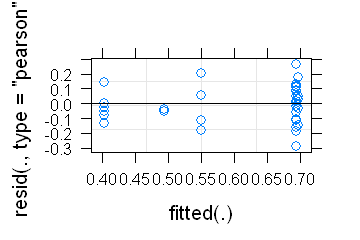

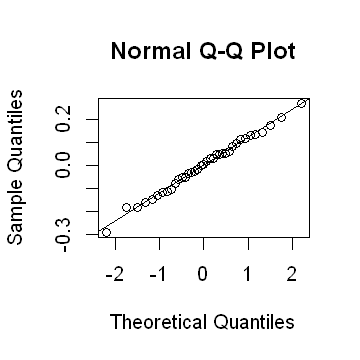

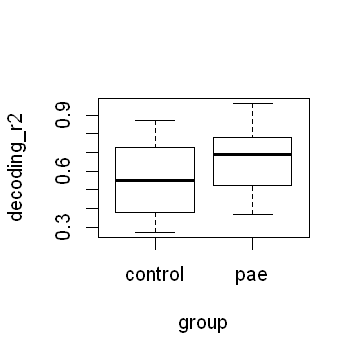

In [19]:
m1 = lmer(decoding_r2 ~ group + (1 | rat), data = decoding_df[decoding_df$area == "ca3",],REML=FALSE)
m1.null = lmer(decoding_r2 ~ 1 + (1 | rat), data = decoding_df[decoding_df$area == "ca3",], REML=FALSE)

anova(m1.null, m1)  
summary(m1)
options(repr.plot.width = 3, repr.plot.height = 2)

plot(m1)
options(repr.plot.width = 3, repr.plot.height = 3)
qqnorm(resid(m1)) 
qqline(resid(m1))

plot(decoding_r2 ~ group, data = decoding_df[decoding_df$area == "ca3",])

## Median decoding error

[1] 6.118852

[1] 5.512749

boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,3,95.15231,98.28588,-44.57616,89.15231,NA,NA,NA
m1,4,94.73819,98.91628,-43.36910,86.73819,2.414121,1,0.1202455


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: decoding_median_error ~ group + (1 | rat)
   Data: decoding_df[decoding_df$area == "ca1", ]

     AIC      BIC   logLik deviance df.resid 
    94.7     98.9    -43.4     86.7       17 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.4860 -0.7185 -0.3080  0.2629  2.2745 

Random effects:
 Groups   Name        Variance Std.Dev.
 rat      (Intercept) 0.000    0.000   
 Residual             3.642    1.908   
Number of obs: 21, groups:  rat, 5

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)   7.1137     0.6747 21.0000  10.543 7.61e-10 ***
grouppae     -1.3716     0.8575 21.0000  -1.599    0.125    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.787
optimizer (nloptwrap) convergence code: 0 (OK)
boundary (singular) fit: see ?isSingular


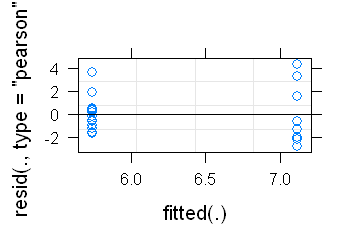

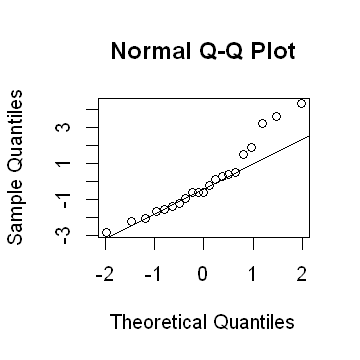

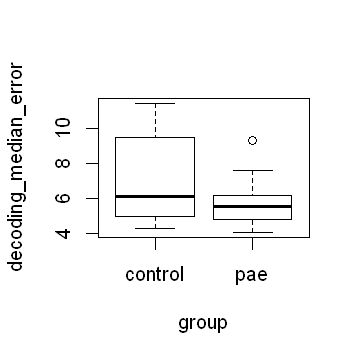

In [20]:
median(decoding_df[decoding_df$area == "ca1" & decoding_df$group == "control",]$decoding_median_error)
median(decoding_df[decoding_df$area == "ca1" & decoding_df$group == "pae",]$decoding_median_error)

m1 = lmer(decoding_median_error ~ group + (1 | rat), data = decoding_df[decoding_df$area == "ca1",],REML=FALSE)
m1.null = lmer(decoding_median_error ~ 1 + (1 | rat), data = decoding_df[decoding_df$area == "ca1",], REML=FALSE)

anova(m1.null, m1)  
summary(m1)
options(repr.plot.width = 3, repr.plot.height = 2)

plot(m1)
options(repr.plot.width = 3, repr.plot.height = 3)
qqnorm(resid(m1)) 
qqline(resid(m1))

plot(decoding_median_error ~ group, data = decoding_df[decoding_df$area == "ca1",])

[1] 10.90485

[1] 7.882276

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,3,206.8442,211.6770,-100.4221,200.8442,NA,NA,NA
m1,4,208.8350,215.2787,-100.4175,200.8350,0.009192481,1,0.9236179


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: decoding_median_error ~ group + (1 | rat)
   Data: decoding_df[decoding_df$area == "ca3", ]

     AIC      BIC   logLik deviance df.resid 
   208.8    215.3   -100.4    200.8       33 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.8799 -0.6620 -0.2957  0.6304  2.1928 

Random effects:
 Groups   Name        Variance Std.Dev.
 rat      (Intercept) 13.580   3.685   
 Residual              9.897   3.146   
Number of obs: 37, groups:  rat, 5

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)   
(Intercept)  12.3867     2.7487  4.9914   4.506  0.00639 **
grouppae     -0.3456     3.5920  5.1885  -0.096  0.92695   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.765

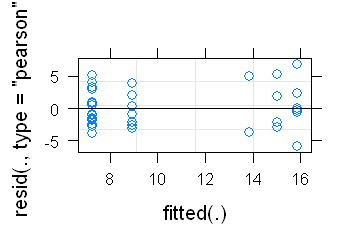

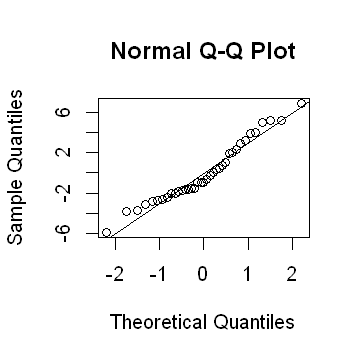

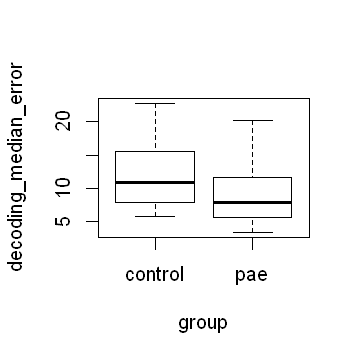

In [22]:
median(decoding_df[decoding_df$area == "ca3" & decoding_df$group == "control",]$decoding_median_error)
median(decoding_df[decoding_df$area == "ca3" & decoding_df$group == "pae",]$decoding_median_error)

m1 = lmer(decoding_median_error ~ group + (1 | rat), data = decoding_df[decoding_df$area == "ca3",],REML=FALSE)
m1.null = lmer(decoding_median_error ~ 1 + (1 | rat), data = decoding_df[decoding_df$area == "ca3",], REML=FALSE)

anova(m1.null, m1)  
summary(m1)
options(repr.plot.width = 3, repr.plot.height = 2)

plot(m1)
options(repr.plot.width = 3, repr.plot.height = 3)
qqnorm(resid(m1)) 
qqline(resid(m1))

plot(decoding_median_error ~ group, data = decoding_df[decoding_df$area == "ca3",])

## proportion of significant replay per session

In [3]:
summary(sig_replay_df)

       X                            session        rat         group   
 Min.   : 0.00   LEM3116_S20180717110938: 1   LEM3116: 9   control:21  
 1st Qu.:14.25   LEM3116_S20180717203042: 1   LEM3120: 1   pae    :37  
 Median :28.50   LEM3116_S20180718184628: 1   LEM3124: 6               
 Mean   :28.50   LEM3116_S20180802100324: 1   LEM3206:18               
 3rd Qu.:42.75   LEM3116_S20180803103321: 1   LEM3216:11               
 Max.   :57.00   LEM3116_S20180806104145: 1   LEM3246: 4               
                 (Other)                :52   LS19   : 9               
  area       prop_sig          n_events    
 ca1:21   Min.   :0.00000   Min.   :  1.0  
 ca3:37   1st Qu.:0.07143   1st Qu.: 14.0  
          Median :0.11853   Median : 53.0  
          Mean   :0.20326   Mean   :114.3  
          3rd Qu.:0.20443   3rd Qu.:164.5  
          Max.   :1.00000   Max.   :541.0  
                                           

[1] 0.1463106

[1] 0.1894368

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,2,260.4914,262.5805,-128.2457,256.4914,NA,NA,NA
m1,3,262.4812,265.6148,-128.2406,256.4812,0.01021452,1,0.9194973


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: prop_sig ~ group + (1 | rat)
   Data: sig_replay_df[sig_replay_df$area == "ca1", ]
Weights: n_events

     AIC      BIC   logLik deviance df.resid 
   262.5    265.6   -128.2    256.5       18 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.3689 -1.9167 -0.5633  1.9121  5.6855 

Random effects:
 Groups Name        Variance Std.Dev.
 rat    (Intercept) 0.03699  0.1923  
Number of obs: 21, groups:  rat, 5

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.6090     0.1298 -12.395   <2e-16 ***
grouppae     -0.0205     0.2030  -0.101     0.92    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.640

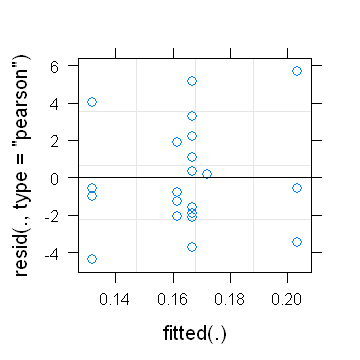

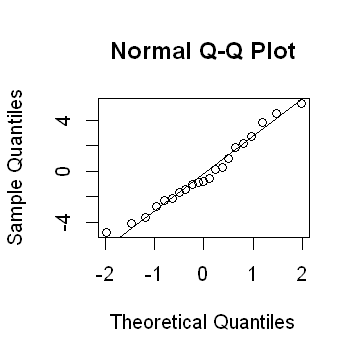

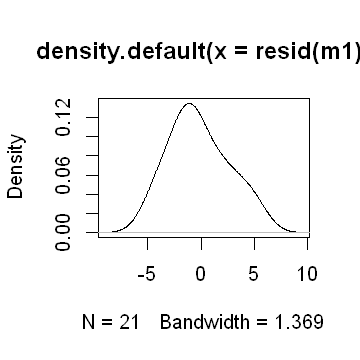

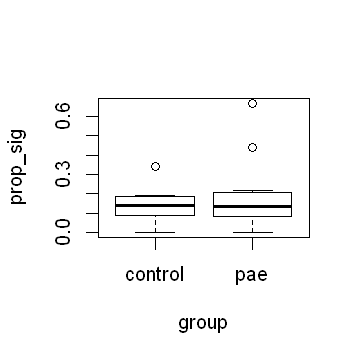

In [8]:
mean(sig_replay_df[sig_replay_df$group=='control' & sig_replay_df$area=='ca1',]$prop_sig)
mean(sig_replay_df[sig_replay_df$group=='pae' & sig_replay_df$area=='ca1',]$prop_sig)

m1 = glmer(prop_sig ~ group + (1|rat), weights=n_events, data=sig_replay_df[sig_replay_df$area=='ca1',],family="binomial")
m1.null = glmer(prop_sig ~ 1 + (1|rat), weights=n_events, data=sig_replay_df[sig_replay_df$area=='ca1',],family="binomial")

anova(m1.null, m1)  

summary(m1)
# overdisp.glmer(m1)

options(repr.plot.width = 3, repr.plot.height = 3)

plot(m1)
qqnorm(resid(m1))
qqline(resid(m1))
plot(density(resid(m1)))

plot(prop_sig ~ group, data = sig_replay_df[sig_replay_df$area == "ca1",])



[1] 0.3189392

[1] 0.1670718

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,2,333.7773,336.9992,-164.8887,329.7773,NA,NA,NA
m1,3,333.6245,338.4573,-163.8123,327.6245,2.152821,1,0.1423082


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: prop_sig ~ group + (1 | rat)
   Data: sig_replay_df[sig_replay_df$area == "ca3", ]
Weights: n_events

     AIC      BIC   logLik deviance df.resid 
   333.6    338.5   -163.8    327.6       34 

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-4.309 -1.027 -0.350  1.170  7.743 

Random effects:
 Groups Name        Variance Std.Dev.
 rat    (Intercept) 0.2028   0.4503  
Number of obs: 37, groups:  rat, 5

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.2289     0.3326  -3.695  0.00022 ***
grouppae     -0.7823     0.4740  -1.651  0.09884 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.699

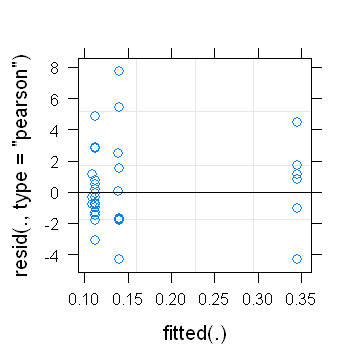

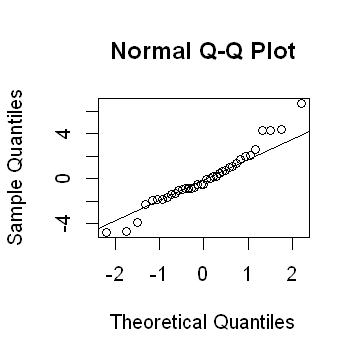

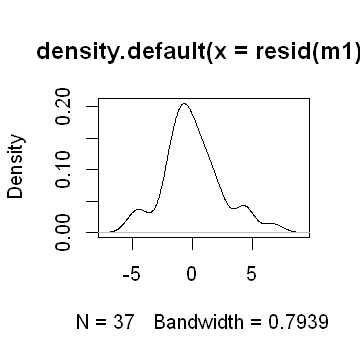

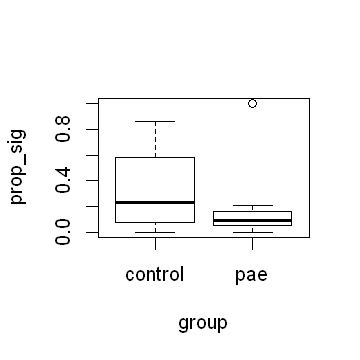

In [9]:
mean(sig_replay_df[sig_replay_df$group=='control' & sig_replay_df$area=='ca3',]$prop_sig)
mean(sig_replay_df[sig_replay_df$group=='pae' & sig_replay_df$area=='ca3',]$prop_sig)

m1 = glmer(prop_sig ~ group + (1|rat), weights=n_events, data=sig_replay_df[sig_replay_df$area=='ca3',],family="binomial")
m1.null = glmer(prop_sig ~ 1 + (1|rat), weights=n_events, data=sig_replay_df[sig_replay_df$area=='ca3',],family="binomial")

anova(m1.null, m1)  

summary(m1)
# overdisp.glmer(m1)

options(repr.plot.width = 3, repr.plot.height = 3)

plot(m1)
qqnorm(resid(m1))
qqline(resid(m1))
plot(density(resid(m1)))

plot(prop_sig ~ group, data = sig_replay_df[sig_replay_df$area == "ca3",])

## Proportion of forward / reverse replay

In [53]:
summary(fr_replay_df)

       X                         session        rat        group     area   
 Min.   : 0   LEM3116_S20180717110938: 1   LEM3116:5   control:14   ca1:15  
 1st Qu.: 7   LEM3116_S20180717203042: 1   LEM3120:1   pae    :15   ca3:14  
 Median :14   LEM3116_S20180718184628: 1   LEM3124:2                        
 Mean   :14   LEM3116_S20180803103321: 1   LEM3206:7                        
 3rd Qu.:21   LEM3116_S20180808160117: 1   LEM3216:8                        
 Max.   :28   LEM3120_S20181007151036: 1   LS19   :6                        
              (Other)                :23                                    
  prop_forward     prop_reverse       n_events     
 Min.   :0.0000   Min.   :0.0000   Min.   : 1.000  
 1st Qu.:0.5000   1st Qu.:0.0000   1st Qu.: 1.000  
 Median :0.5625   Median :0.4375   Median : 4.000  
 Mean   :0.6021   Mean   :0.3979   Mean   : 5.828  
 3rd Qu.:1.0000   3rd Qu.:0.5000   3rd Qu.: 6.000  
 Max.   :1.0000   Max.   :1.0000   Max.   :38.000  
                    

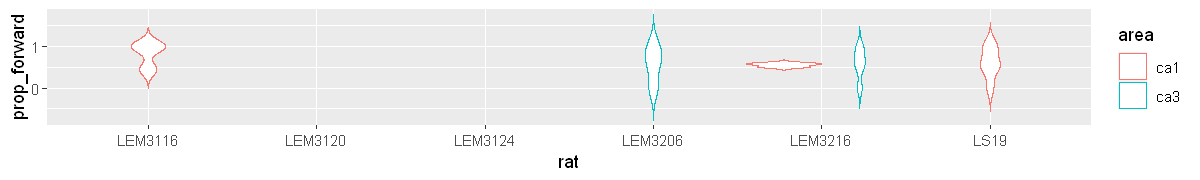

In [54]:
options(repr.plot.width = 10, repr.plot.height = 1.5)

p<-ggplot(fr_replay_df, aes(x=rat, y=prop_forward, color=area)) +
    geom_violin(trim=FALSE)
p

boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,2,51.86391,53.28001,-23.93195,47.86391,NA,NA,NA
m1,3,53.85860,55.98275,-23.92930,47.85860,0.005302721,1,0.9419495


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: prop_forward ~ group + (1 | rat)
   Data: fr_replay_df[fr_replay_df$area == "ca1", ]
Weights: n_events

     AIC      BIC   logLik deviance df.resid 
    53.9     56.0    -23.9     47.9       12 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.4585 -0.5093 -0.2450  0.7044  2.0342 

Random effects:
 Groups Name        Variance Std.Dev.
 rat    (Intercept) 0        0       
Number of obs: 15, groups:  rat, 5

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  0.37156    0.29066   1.278    0.201
grouppae    -0.02672    0.36705  -0.073    0.942

Correlation of Fixed Effects:
         (Intr)
grouppae -0.792
optimizer (Nelder_Mead) convergence code: 0 (OK)
boundary (singular) fit: see ?isSingular


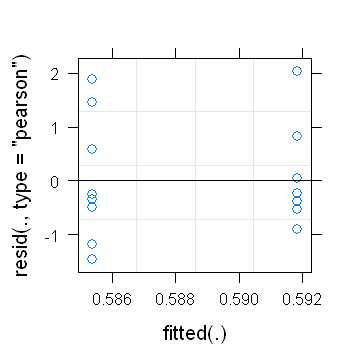

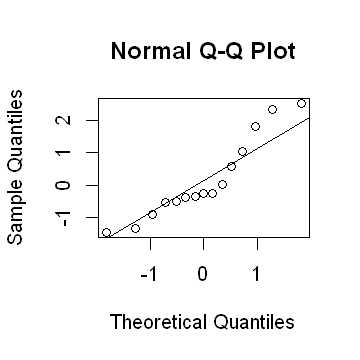

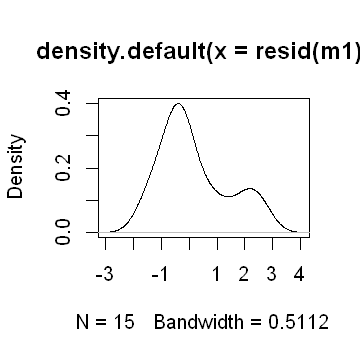

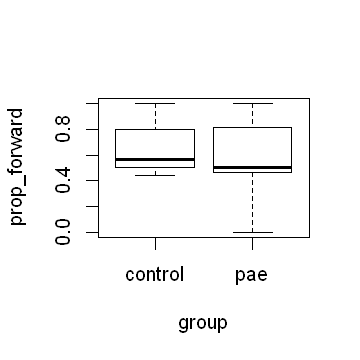

In [55]:
m1 = glmer(prop_forward ~ group + (1|rat), weights=n_events, data=fr_replay_df[fr_replay_df$area=='ca1',],family="binomial")
m1.null = glmer(prop_forward ~ 1 + (1|rat), weights=n_events, data=fr_replay_df[fr_replay_df$area=='ca1',],family="binomial")

anova(m1.null, m1)  

summary(m1)
# overdisp.glmer(m1)

options(repr.plot.width = 3, repr.plot.height = 3)

plot(m1)
qqnorm(resid(m1))
qqline(resid(m1))
plot(density(resid(m1)))

plot(prop_forward ~ group, data = fr_replay_df[fr_replay_df$area == "ca1",])

boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,2,29.37865,30.65677,-12.68933,25.37865,NA,NA,NA
m1,3,31.37017,33.28734,-12.68508,25.37017,0.00848532,1,0.926606


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: prop_forward ~ group + (1 | rat)
   Data: fr_replay_df[fr_replay_df$area == "ca3", ]
Weights: n_events

     AIC      BIC   logLik deviance df.resid 
    31.4     33.3    -12.7     25.4       11 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.26491 -0.79829  0.09129  0.79057  1.16667 

Random effects:
 Groups Name        Variance Std.Dev.
 rat    (Intercept) 0        0       
Number of obs: 14, groups:  rat, 3

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  0.40547    0.40825   0.993    0.321
grouppae     0.06454    0.70119   0.092    0.927

Correlation of Fixed Effects:
         (Intr)
grouppae -0.582
optimizer (Nelder_Mead) convergence code: 0 (OK)
boundary (singular) fit: see ?isSingular


Warning message in sqrt(object$devResid()):
"NaNs produced"

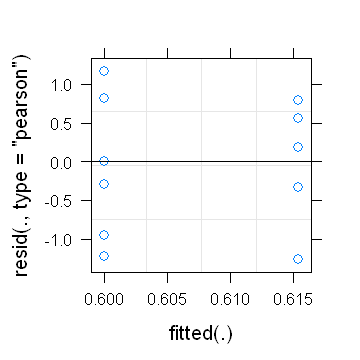

Warning message in sqrt(object$devResid()):
"NaNs produced"Warning message in sqrt(object$devResid()):
"NaNs produced"

ERROR: Error in density.default(resid(m1)): 'x' contains missing values


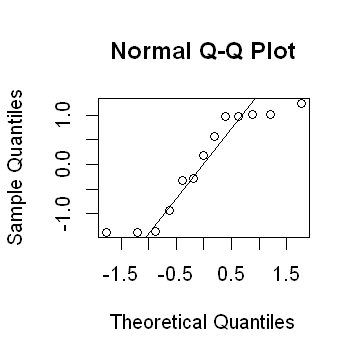

In [56]:
m1 = glmer(prop_forward ~ group + (1|rat), weights=n_events, data=fr_replay_df[fr_replay_df$area=='ca3',],family="binomial")
m1.null = glmer(prop_forward ~ 1 + (1|rat), weights=n_events, data=fr_replay_df[fr_replay_df$area=='ca3',],family="binomial")

anova(m1.null, m1)  

summary(m1)
# overdisp.glmer(m1)

options(repr.plot.width = 3, repr.plot.height = 3)

plot(m1)
qqnorm(resid(m1))
qqline(resid(m1))
plot(density(resid(m1)))

plot(prop_forward ~ group, data = fr_replay_df[fr_replay_df$area == "ca3",])

# Load monosynaptic data

In [93]:
df <- read.csv('F:/Projects/PAE_PlaceCell/analysis/monosynaptic/post_processed/monosynaptic_df.csv')


df$group = factor(df$group, levels=c('control', 'pae'))
df$rat = factor(df$rat)
df$session = factor(df$session)
df$area = factor(df$area, levels=c('ca1', 'ca3'))
df$type = factor(df$type)

summary(df)

       X                           session       trans_prob      
 Min.   :   0   LEM3206_S20190718143924: 201   Min.   :0.000000  
 1st Qu.: 465   LEM3206_S20190718172605: 185   1st Qu.:0.005626  
 Median : 930   LEM3206_S20190717140525: 165   Median :0.013047  
 Mean   : 930   LEM3206_S20190716135207:  88   Mean   :0.024095  
 3rd Qu.:1395   LEM3206_S20190709104450:  86   3rd Qu.:0.030881  
 Max.   :1860   LEM3206_S20190715171306:  80   Max.   :0.374311  
                (Other)                :1056                     
         type           ref            target         area_ref    cell_type_ref
 excitatory:1129   Min.   :  1.0   Min.   :  1.00   ca1   : 250   int: 497     
 inhibitory: 732   1st Qu.: 19.0   1st Qu.: 19.00   ca3   :1607   pyr:1364     
                   Median : 35.0   Median : 33.00   cortex:   4                
                   Mean   : 41.9   Mean   : 40.65                              
                   3rd Qu.: 63.0   3rd Qu.: 58.00                       

## trans_prob excitatory CA1

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,521.6887,535.0388,-256.8443,513.6887,NA,NA,NA
m1,5,523.3616,540.0493,-256.6808,513.3616,0.3271054,1,0.5673685


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: trans_prob_trans ~ group + (1 | rat/session)
   Data: temp_df[temp_df$area == "ca1", ]

     AIC      BIC   logLik deviance df.resid 
   523.4    540.0   -256.7    513.4      203 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.2580 -0.4940  0.0310  0.5701  2.4512 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.1124   0.3353  
 rat         (Intercept) 0.1546   0.3932  
 Residual                0.5879   0.7668  
Number of obs: 208, groups:  session:rat, 44; rat, 7

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)  -3.7054     0.2786  4.7445 -13.298 6.17e-05 ***
grouppae      0.2087     0.3632  4.5108   0.575    0.593    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.767

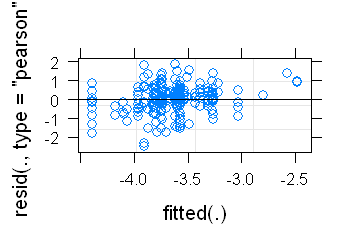

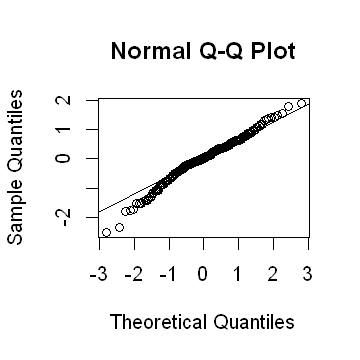

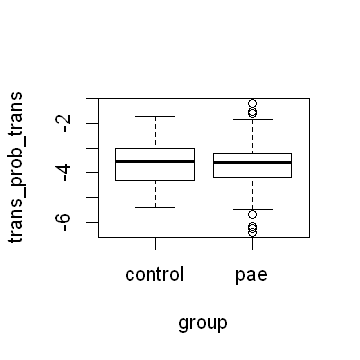

In [94]:
temp_df = df[df$type == "excitatory",]

temp_df$trans_prob_trans = log(temp_df$trans_prob)

m1 = lmer(trans_prob_trans ~ group + (1 | rat/session), data = temp_df[temp_df$area == "ca1",],REML=FALSE)
m1.null = lmer(trans_prob_trans ~ 1 + (1 | rat/session), data = temp_df[temp_df$area == "ca1",], REML=FALSE)
anova(m1.null, m1)  
summary(m1)
options(repr.plot.width = 3, repr.plot.height = 2)

plot(m1)
options(repr.plot.width = 3, repr.plot.height = 3)
qqnorm(resid(m1)) 
qqline(resid(m1))

plot(trans_prob_trans ~ group, data = temp_df[temp_df$area == "ca1",])

## trans_prob excitatory CA3

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,2351.995,2371.279,-1171.997,2343.995,NA,NA,NA
m1,5,2349.957,2374.063,-1169.979,2339.957,4.037401,1,0.04450231


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: trans_prob_trans ~ group + (1 | rat/session)
   Data: temp_df[temp_df$area == "ca3", ]

     AIC      BIC   logLik deviance df.resid 
  2350.0   2374.1  -1170.0   2340.0      912 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.1124 -0.5793 -0.0087  0.6519  2.8012 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.23236  0.4820  
 rat         (Intercept) 0.01505  0.1227  
 Residual                0.67686  0.8227  
Number of obs: 917, groups:  session:rat, 89; rat, 6

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)  -3.2842     0.1532  3.2066 -21.435 0.000143 ***
grouppae     -0.5650     0.1905  2.5209  -2.965 0.073582 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.804

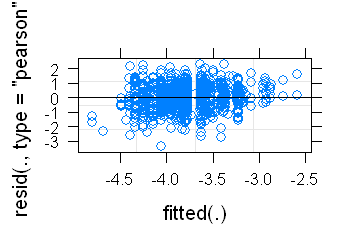

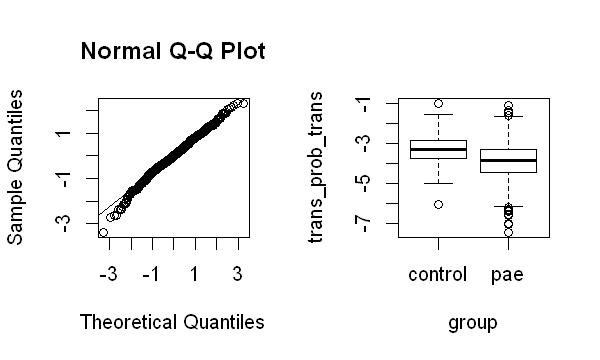

In [95]:
temp_df = df[df$type == "excitatory",]

temp_df$trans_prob_trans = log(temp_df$trans_prob)

m1 = lmer(trans_prob_trans ~ group + (1 | rat/session), data = temp_df[temp_df$area == "ca3",],REML=FALSE)
m1.null = lmer(trans_prob_trans ~ 1 + (1 | rat/session), data = temp_df[temp_df$area == "ca3",], REML=FALSE)
anova(m1.null, m1)  
summary(m1)

options(repr.plot.width = 3, repr.plot.height = 2)
plot(m1)

options(repr.plot.width = 5, repr.plot.height = 3)
par(mfrow=c(1,2))

qqnorm(resid(m1)) 
qqline(resid(m1))

plot(trans_prob_trans ~ group, data = temp_df[temp_df$area == "ca3",])

## trans_prob inhibitory CA1

boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,-198.3342,-191.3835,103.1671,-206.3342,NA,NA,NA
m1,5,-196.9482,-188.2598,103.4741,-206.9482,0.613968,1,0.4332977


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: trans_prob_trans ~ group + (1 | rat/session)
   Data: temp_df[temp_df$area == "ca1", ]

     AIC      BIC   logLik deviance df.resid 
  -196.9   -188.3    103.5   -206.9       37 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.8341 -0.2543 -0.0529  0.2196  4.6998 

Random effects:
 Groups      Name        Variance  Std.Dev.
 session:rat (Intercept) 0.0000000 0.00000 
 rat         (Intercept) 0.0035308 0.05942 
 Residual                0.0002394 0.01547 
Number of obs: 42, groups:  session:rat, 14; rat, 6

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)  
(Intercept)  0.07101    0.03497  5.85462   2.031   0.0898 .
grouppae    -0.03946    0.04919  5.72818  -0.802   0.4544  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.711
optimizer (nloptwrap) convergence co

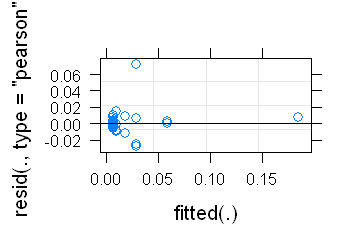

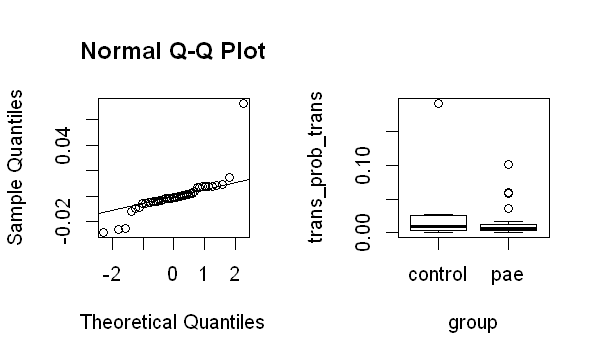

In [96]:
temp_df = df[df$type == "inhibitory",]

temp_df$trans_prob_trans = log(temp_df$trans_prob+1)

m1 = lmer(trans_prob_trans ~ group + (1 | rat/session), data = temp_df[temp_df$area == "ca1",],REML=FALSE)
m1.null = lmer(trans_prob_trans ~ 1 + (1 | rat/session), data = temp_df[temp_df$area == "ca1",], REML=FALSE)
anova(m1.null, m1)  
summary(m1)

options(repr.plot.width = 3, repr.plot.height = 2)
plot(m1)

options(repr.plot.width = 5, repr.plot.height = 3)
par(mfrow=c(1,2))

qqnorm(resid(m1)) 
qqline(resid(m1))

plot(trans_prob_trans ~ group, data = temp_df[temp_df$area == "ca1",])

## trans_prob inhibitory CA3

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,-4148.764,-4130.617,2078.382,-4156.764,NA,NA,NA
m1,5,-4148.093,-4125.410,2079.047,-4158.093,1.329805,1,0.2488399


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: trans_prob_trans ~ group + (1 | rat/session)
   Data: temp_df[temp_df$area == "ca3", ]

     AIC      BIC   logLik deviance df.resid 
 -4148.1  -4125.4   2079.0  -4158.1      685 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.7073 -0.3615 -0.1217  0.1088  8.2905 

Random effects:
 Groups      Name        Variance  Std.Dev.
 session:rat (Intercept) 0.0004875 0.02208 
 rat         (Intercept) 0.0014000 0.03742 
 Residual                0.0001109 0.01053 
Number of obs: 690, groups:  session:rat, 49; rat, 6

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)
(Intercept) 0.005735   0.023657 7.029957   0.242    0.815
grouppae    0.039470   0.032593 6.445227   1.211    0.268

Correlation of Fixed Effects:
         (Intr)
grouppae -0.726

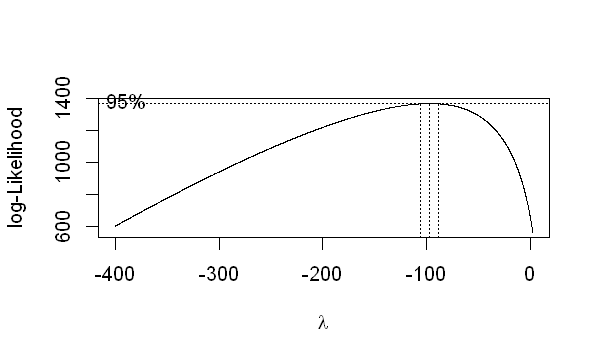

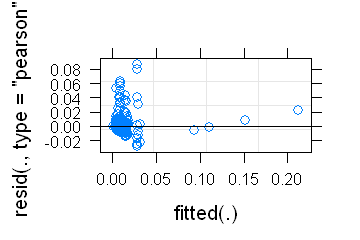

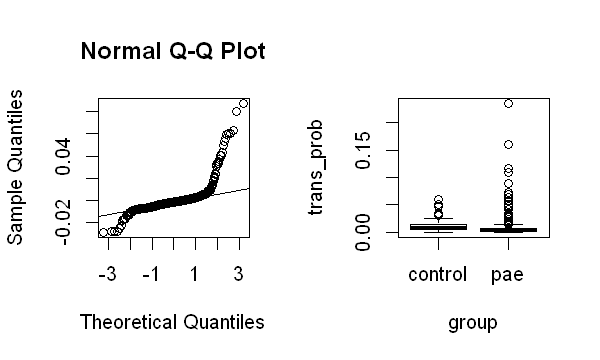

In [97]:
temp_df = df[df$type == "inhibitory",]

temp_df$trans_prob_constant = temp_df$trans_prob+1

# odd distribution here, so used boxcox to identify factor
m1 = lm(trans_prob_constant ~ group, data = temp_df[temp_df$area == "ca3",])
# plot(m1)
boxcox.list <- boxcox(m1, lambda = seq(-400, 2, 1/10))
trans_factor = boxcox.list$x[which.max(boxcox.list$y)]

temp_df$trans_prob_trans = temp_df$trans_prob_constant^trans_factor

temp_df$trans_prob_trans = temp_df$trans_prob

m1 = lmer(trans_prob_trans ~ group + (1 | rat/session), data = temp_df[temp_df$area == "ca3",],REML=FALSE)
m1.null = lmer(trans_prob_trans ~ 1 + (1 | rat/session), data = temp_df[temp_df$area == "ca3",], REML=FALSE)
anova(m1.null, m1)  
summary(m1)

options(repr.plot.width = 3, repr.plot.height = 2)
plot(m1)

options(repr.plot.width = 5, repr.plot.height = 3)
par(mfrow=c(1,2))

qqnorm(resid(m1)) 
qqline(resid(m1))

plot(trans_prob ~ group, data = temp_df[temp_df$area == "ca3",])

In [2]:
df <- read.csv('F:/Projects/PAE_PlaceCell/analysis/monosynaptic/post_processed/prop_df.csv')


df$group = factor(df$group, levels=c('control', 'pae'))
df$rat = factor(df$rat)
df$session = factor(df$session)
df$area = factor(df$area, levels=c('ca1', 'ca3'))


summary(df)

       X                             session         rat         group   
 Min.   :  0.00   LEM3124_S20190315160017:  2   LEM3206:30   control:46  
 1st Qu.: 34.25   LEM3124_S20190325164111:  2   LEM3124:26   pae    :92  
 Median : 68.50   LEM3124_S20190401125222:  2   LEM3216:23               
 Mean   : 68.50   LEM3116_S20180715121821:  1   LEM3116:18               
 3rd Qu.:102.75   LEM3116_S20180716174306:  1   LEM3246:15               
 Max.   :137.00   LEM3116_S20180717110938:  1   LS19   :13               
                  (Other)                :129   (Other):13               
   area    prop_excitatory     n_events     
 ca1 :45   Min.   :0.0000   Min.   :  1.00  
 ca3 :91   1st Qu.:0.6278   1st Qu.:  2.00  
 NA's: 2   Median :1.0000   Median :  4.00  
           Mean   :0.8054   Mean   : 13.49  
           3rd Qu.:1.0000   3rd Qu.:  9.00  
           Max.   :1.0000   Max.   :201.00  
                                            

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,2,113.4695,117.0829,-54.73477,109.4695,NA,NA,NA
m1,3,114.2643,119.6842,-54.13213,108.2643,1.205285,1,0.2722679


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: prop_excitatory ~ group + (1 | rat)
   Data: df[df$area == "ca1", ]
Weights: n_events

     AIC      BIC   logLik deviance df.resid 
   114.3    119.7    -54.1    108.3       42 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.7819  0.2135  0.4605  0.7135  1.5634 

Random effects:
 Groups Name        Variance Std.Dev.
 rat    (Intercept) 0.358    0.5983  
Number of obs: 45, groups:  rat, 8

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   2.4907     0.5560   4.480 7.47e-06 ***
grouppae     -0.9579     0.7211  -1.328    0.184    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.786

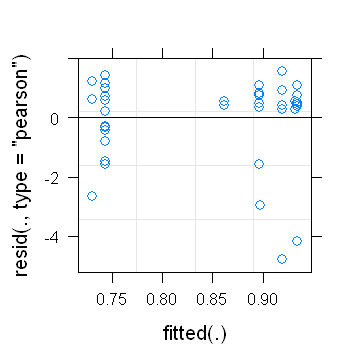

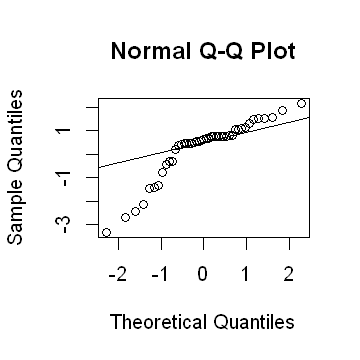

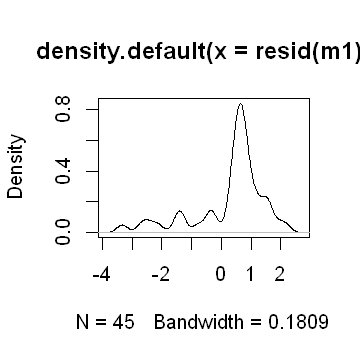

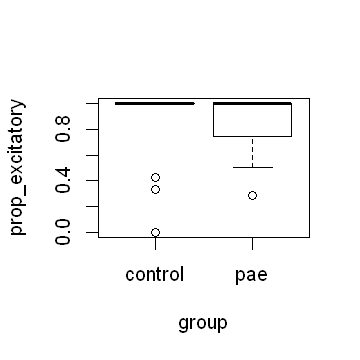

In [4]:
m1 = glmer(prop_excitatory ~ group + (1|rat), weights=n_events, data=df[df$area=='ca1',],family="binomial")
m1.null = glmer(prop_excitatory ~ 1 + (1|rat), weights=n_events, data=df[df$area=='ca1',],family="binomial")

anova(m1.null, m1)  

summary(m1)
# overdisp.glmer(m1)

options(repr.plot.width = 3, repr.plot.height = 3)


plot(m1)

qqnorm(resid(m1))
qqline(resid(m1))
plot(density(resid(m1)))

plot(prop_excitatory ~ group, data = df[df$area == "ca1",])

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,2,404.5326,409.5543,-200.2663,400.5326,NA,NA,NA
m1,3,406.3881,413.9207,-200.1941,400.3881,0.144494,1,0.7038536


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: prop_excitatory ~ group + (1 | rat)
   Data: df[df$area == "ca3", ]
Weights: n_events

     AIC      BIC   logLik deviance df.resid 
   406.4    413.9   -200.2    400.4       88 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-7.0817 -0.1674  0.5046  0.8406  5.4424 

Random effects:
 Groups Name        Variance Std.Dev.
 rat    (Intercept) 0.9412   0.9702  
Number of obs: 91, groups:  rat, 6

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)   1.0731     0.6938   1.547    0.122
grouppae      0.3506     0.9153   0.383    0.702

Correlation of Fixed Effects:
         (Intr)
grouppae -0.754

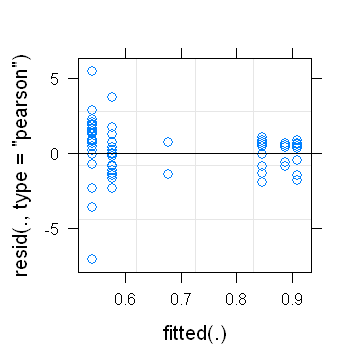

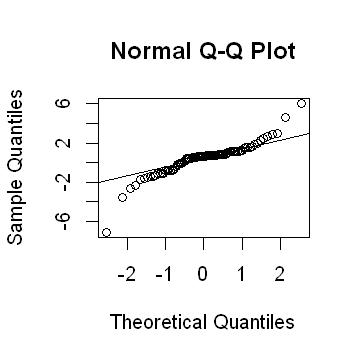

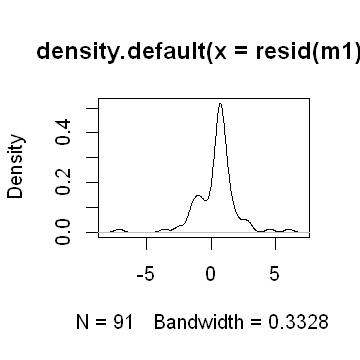

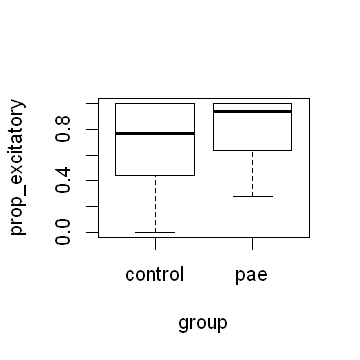

In [5]:
m1 = glmer(prop_excitatory ~ group + (1|rat), weights=n_events, data=df[df$area=='ca3',],family="binomial")
m1.null = glmer(prop_excitatory ~ 1 + (1|rat), weights=n_events, data=df[df$area=='ca3',],family="binomial")

anova(m1.null, m1)  

summary(m1)
# overdisp.glmer(m1)

options(repr.plot.width = 3, repr.plot.height = 3)

plot(m1)
qqnorm(resid(m1))
qqline(resid(m1))
plot(density(resid(m1)))

plot(prop_excitatory ~ group, data = df[df$area == "ca3",])

# Compare the number of pre synaptic partners

In [3]:
df <- read.csv('F:/Projects/PAE_PlaceCell/analysis/monosynaptic/post_processed/pre_df.csv')

df$group = factor(df$group, levels=c('control', 'pae'))
df$rat = factor(df$rat)
df$session = factor(df$session)
df$area = factor(df$area, levels=c('ca1', 'ca3'))

summary(df)

       X                            session         rat          group    
 Min.   :  0.0   LEM3206_S20190718143924: 57   LEM3206:517   control:167  
 1st Qu.:220.8   LEM3206_S20190718172605: 54   LEM3216:118   pae    :717  
 Median :441.5   LEM3206_S20190717140525: 47   LEM3124: 75                
 Mean   :441.5   LEM3206_S20190716135207: 37   LS19   : 74                
 3rd Qu.:662.2   LEM3206_S20190715171306: 35   LEM3116: 41                
 Max.   :883.0   LEM3206_S20190724151552: 29   LEM3246: 36                
                 (Other)                :625   (Other): 23                
  area     cell_type   n_partners    
 ca1:168   int:239   Min.   : 1.000  
 ca3:716   pyr:645   1st Qu.: 1.000  
                     Median : 1.000  
                     Mean   : 2.101  
                     3rd Qu.: 2.000  
                     Max.   :23.000  
                                     

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: poisson  ( log )
Formula: n_partners_trans ~ group + (1 | rat/session)
   Data: df[df$area == "ca1", ]

     AIC      BIC   logLik deviance df.resid 
   494.8    507.3   -243.4    486.8      164 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.3332 -0.4182 -0.2562 -0.1610  5.6247 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.05115  0.2262  
 rat         (Intercept) 0.01518  0.1232  
Number of obs: 168, groups:  session:rat, 45; rat, 8

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   0.5793     0.1548   3.742 0.000183 ***
grouppae     -0.3413     0.1932  -1.766 0.077364 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.764

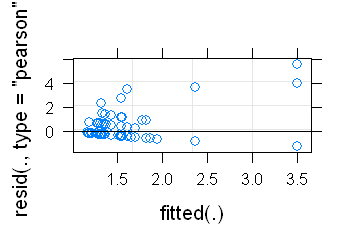

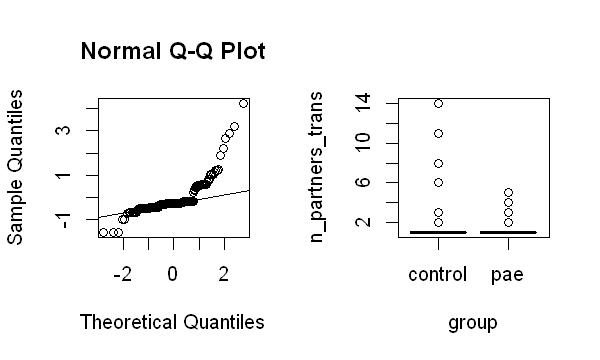

In [6]:
df$n_partners_trans = (df$n_partners)

m1 = glmer(n_partners_trans ~ group + (1 | rat/session), data=df[df$area=='ca1',],family="poisson")
summary(m1)

options(repr.plot.width = 3, repr.plot.height = 2)
plot(m1)

options(repr.plot.width = 5, repr.plot.height = 3)
par(mfrow=c(1,2))

qqnorm(resid(m1)) 
qqline(resid(m1))

plot(n_partners_trans ~ group, data = df[df$area == "ca1",])

In [11]:
# install.packages("AER")
# library(AER)
# deviance(m1)/m1$df.residual
# dispersiontest(m1)

ERROR: Error in dispersiontest(m1): only Poisson GLMs can be tested


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: poisson  ( log )
Formula: n_partners_trans ~ group + (1 | rat/session)
   Data: df[df$area == "ca3", ]

     AIC      BIC   logLik deviance df.resid 
  2865.6   2883.9  -1428.8   2857.6      712 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.2988 -0.7314 -0.4921  0.1762 12.2802 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.06364  0.2523  
 rat         (Intercept) 0.06901  0.2627  
Number of obs: 716, groups:  session:rat, 91; rat, 6

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  0.34643    0.20797   1.666   0.0958 .
grouppae     0.03247    0.26545   0.122   0.9026  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.764

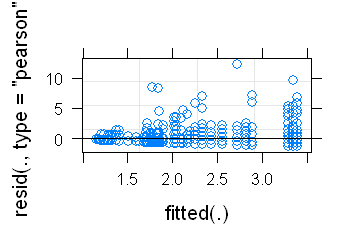

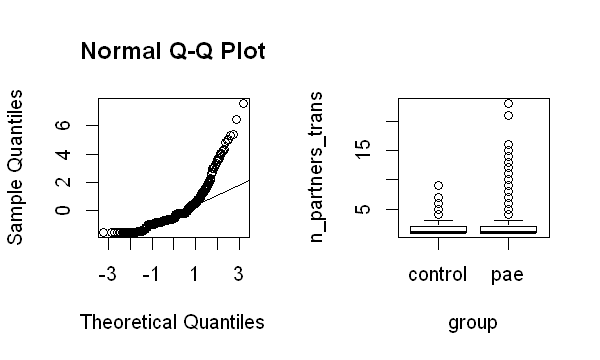

In [10]:
df$n_partners_trans = (df$n_partners)

m1 = glmer(n_partners_trans ~ group + (1 | rat/session), data=df[df$area=='ca3',],family="poisson")
summary(m1)

options(repr.plot.width = 3, repr.plot.height = 2)
plot(m1)

options(repr.plot.width = 5, repr.plot.height = 3)
par(mfrow=c(1,2))

qqnorm(resid(m1)) 
qqline(resid(m1))

plot(n_partners_trans ~ group, data = df[df$area == "ca3",])

# Compare the number of post synaptic partners

In [12]:
df <- read.csv('F:/Projects/PAE_PlaceCell/analysis/monosynaptic/post_processed/post_df.csv')


df$group = factor(df$group, levels=c('control', 'pae'))
df$rat = factor(df$rat)
df$session = factor(df$session)
df$area = factor(df$area, levels=c('ca1', 'ca3'))

summary(df)

       X                             session         rat          group    
 Min.   :   0.0   LEM3206_S20190717140525: 59   LEM3206:606   control:222  
 1st Qu.: 259.8   LEM3206_S20190718143924: 57   LEM3216:159   pae    :818  
 Median : 519.5   LEM3206_S20190718172605: 54   LS19   : 86                
 Mean   : 519.5   LEM3206_S20190716135207: 44   LEM3124: 74                
 3rd Qu.: 779.2   LEM3206_S20190715171306: 42   LEM3116: 56                
 Max.   :1039.0   LEM3206_S20190709104450: 41   LEM3246: 37                
                  (Other)                :743   (Other): 22                
  area     cell_type   n_partners    
 ca1:207   int:217   Min.   : 1.000  
 ca3:833   pyr:823   1st Qu.: 1.000  
                     Median : 1.000  
                     Mean   : 1.786  
                     3rd Qu.: 2.000  
                     Max.   :16.000  
                                     

boundary (singular) fit: see ?isSingular


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: poisson  ( log )
Formula: n_partners_trans ~ group + (1 | rat/session)
   Data: df[df$area == "ca1", ]

     AIC      BIC   logLik deviance df.resid 
   477.8    491.1   -234.9    469.8      203 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.2347 -0.2347 -0.1638 -0.1638  1.6791 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0        0       
 rat         (Intercept) 0        0       
Number of obs: 207, groups:  session:rat, 45; rat, 8

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  0.23419    0.10483   2.234   0.0255 *
grouppae    -0.07056    0.13145  -0.537   0.5914  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.797
optimizer (Nelder_Mead) convergence code: 0 (OK)
boundary (singular) fit: see ?isSingular


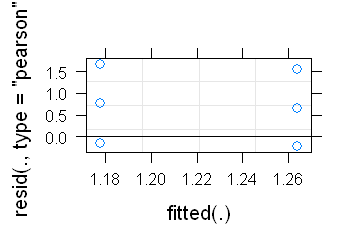

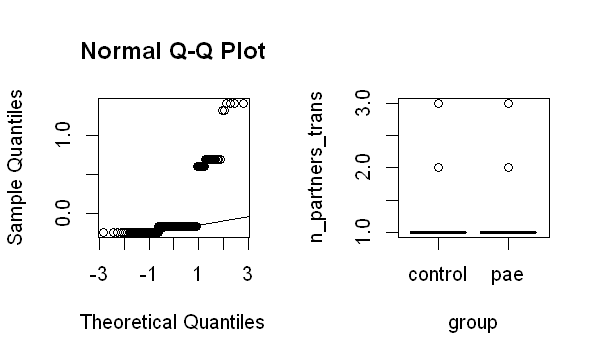

In [16]:
df$n_partners_trans = (df$n_partners)

m1 = glmer(n_partners_trans ~ group + (1 | rat/session), data=df[df$area=='ca1',],family="poisson")
summary(m1)

options(repr.plot.width = 3, repr.plot.height = 2)
plot(m1)

options(repr.plot.width = 5, repr.plot.height = 3)
par(mfrow=c(1,2))

qqnorm(resid(m1)) 
qqline(resid(m1))

plot(n_partners_trans ~ group, data = df[df$area == "ca1",])

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: poisson  ( log )
Formula: n_partners_trans ~ group + (1 | rat/session)
   Data: df[df$area == "ca3", ]

     AIC      BIC   logLik deviance df.resid 
  2710.1   2729.0  -1351.1   2702.1      829 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.2756 -0.5830 -0.3148  0.2017  8.1569 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.05565  0.2359  
 rat         (Intercept) 0.01929  0.1389  
Number of obs: 833, groups:  session:rat, 91; rat, 6

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)   0.2554     0.1381   1.850   0.0644 .
grouppae      0.1283     0.1737   0.739   0.4600  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.751

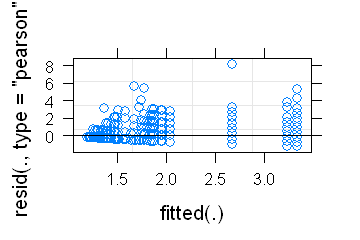

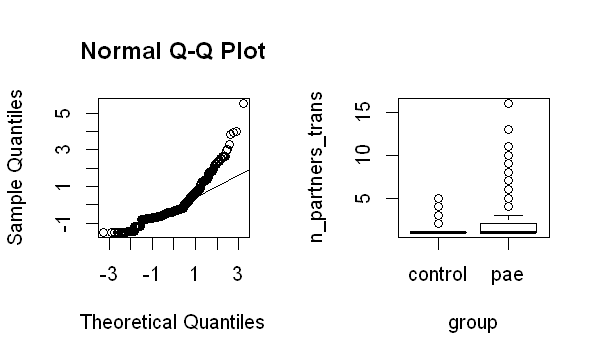

In [19]:
df$n_partners_trans = (df$n_partners)

m1 = glmer(n_partners_trans ~ group + (1 | rat/session), data=df[df$area=='ca3',],family="poisson")
summary(m1)

options(repr.plot.width = 3, repr.plot.height = 2)
plot(m1)

options(repr.plot.width = 5, repr.plot.height = 3)
par(mfrow=c(1,2))

qqnorm(resid(m1)) 
qqline(resid(m1))

plot(n_partners_trans ~ group, data = df[df$area == "ca3",])

# compare the amount of possible ripple time

In [2]:
df <- read.csv('F:/Projects/PAE_PlaceCell/analysis/behavior/df.csv')


df$group = factor(df$group, levels=c('control', 'pae'))
df$rat = factor(df$rat)
df$session = factor(df$session)
df$area = factor(df$area, levels=c('ca1', 'ca3'))

summary(df)

       X           Unnamed..0    ripple_number      start_time     
 Min.   :    0   Min.   :    0   Min.   :  0.00   Min.   :   0.00  
 1st Qu.: 2452   1st Qu.: 2520   1st Qu.:  2.00   1st Qu.:  22.19  
 Median : 5596   Median : 5917   Median :  8.00   Median :  90.14  
 Mean   : 8209   Mean   : 8498   Mean   : 28.96   Mean   : 225.16  
 3rd Qu.:16576   3rd Qu.:17053   3rd Qu.: 27.00   3rd Qu.: 277.49  
 Max.   :18203   Max.   :18732   Max.   :523.00   Max.   :2554.46  
                                                                   
    end_time         ripple_duration     max_emg          peak_time        
 Min.   :   0.2392   Min.   :0.0296   Min.   :0.05222   Min.   :   0.0024  
 1st Qu.:  22.3214   1st Qu.:0.0766   1st Qu.:0.29856   1st Qu.:  22.2428  
 Median :  90.2516   Median :0.1040   Median :0.47948   Median :  90.1588  
 Mean   : 225.3006   Mean   :0.1390   Mean   :0.53384   Mean   : 225.2287  
 3rd Qu.: 277.6104   3rd Qu.:0.1562   3rd Qu.:0.75259   3rd Qu.: 277.5488  


[1] 1485.923

[1] 1623.837

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,3,146.9705,154.1538,-70.48523,140.9705,NA,NA,NA
m1,4,148.9004,158.4782,-70.45020,140.9004,0.07007467,1,0.7912281


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: log(possible_ripple_time) ~ group + (1 | rat)
   Data: df[df$area == "ca1", ]

     AIC      BIC   logLik deviance df.resid 
   148.9    158.5    -70.5    140.9       77 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6460 -0.3621  0.1035  0.6078  2.3017 

Random effects:
 Groups   Name        Variance Std.Dev.
 rat      (Intercept) 0.6327   0.7955  
 Residual             0.2363   0.4861  
Number of obs: 81, groups:  rat, 10

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)   6.8488     0.3481 10.6233  19.672 1.06e-09 ***
grouppae      0.1415     0.5344  9.5850   0.265    0.797    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.652

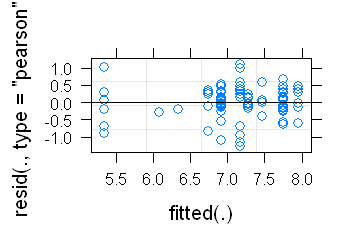

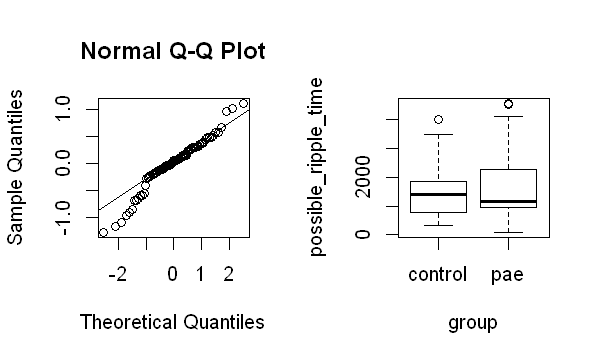

In [8]:
mean(df[df$area == "ca1" & df$group == 'control',]$possible_ripple_time)
mean(df[df$area == "ca1" & df$group == 'pae',]$possible_ripple_time)

m1 = lmer(log(possible_ripple_time) ~ group + (1 | rat), data = df[df$area == "ca1",],REML=FALSE)
m1.null = lmer(log(possible_ripple_time) ~ 1 + (1 | rat), data = df[df$area == "ca1",], REML=FALSE)
anova(m1.null, m1)  
summary(m1)

options(repr.plot.width = 3, repr.plot.height = 2)
plot(m1)

options(repr.plot.width = 5, repr.plot.height = 3)
par(mfrow=c(1,2))

qqnorm(resid(m1)) 
qqline(resid(m1))

plot(possible_ripple_time ~ group, data = df[df$area == "ca1",])

[1] 1567.767

[1] 1517.117

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,3,1897.955,1906.392,-945.9775,1891.955,NA,NA,NA
m1,4,1899.661,1910.910,-945.8304,1891.661,0.2942451,1,0.5875129


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: possible_ripple_time ~ group + (1 | rat)
   Data: df[df$area == "ca3", ]

     AIC      BIC   logLik deviance df.resid 
  1899.7   1910.9   -945.8   1891.7      119 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.8035 -0.5937 -0.1104  0.5208  3.7021 

Random effects:
 Groups   Name        Variance Std.Dev.
 rat      (Intercept) 169512   411.7   
 Residual             243038   493.0   
Number of obs: 123, groups:  rat, 8

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept) 1265.367    211.770    7.430   5.975 0.000443 ***
grouppae     175.962    324.193    6.206   0.543 0.606219    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.653

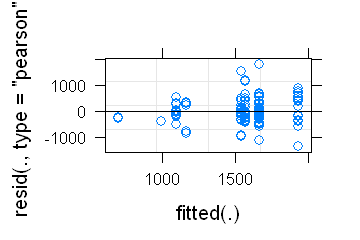

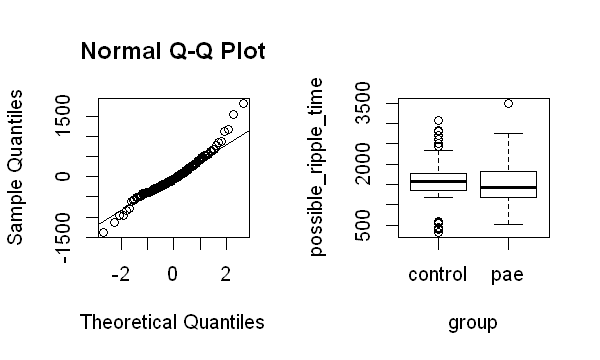

In [9]:
mean(df[df$area == "ca3" & df$group == 'control',]$possible_ripple_time)
mean(df[df$area == "ca3" & df$group == 'pae',]$possible_ripple_time)

m1 = lmer(possible_ripple_time ~ group + (1 | rat), data = df[df$area == "ca3",],REML=FALSE)
m1.null = lmer(possible_ripple_time ~ 1 + (1 | rat), data = df[df$area == "ca3",], REML=FALSE)
anova(m1.null, m1)  
summary(m1)

options(repr.plot.width = 3, repr.plot.height = 2)
plot(m1)

options(repr.plot.width = 5, repr.plot.height = 3)
par(mfrow=c(1,2))

qqnorm(resid(m1)) 
qqline(resid(m1))

plot(possible_ripple_time ~ group, data = df[df$area == "ca3",])